In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling as pp

from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,train_test_split,cross_val_score,cross_validate
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from time import time
from datetime import timedelta
from sklearn.neural_network import MLPClassifier
from IPython.core.interactiveshell import InteractiveShell
from sklearn.metrics import f1_score, precision_score, recall_score

### Original atts:
age; sex (1,0); cp (1-4); trestbps; chol; fbs (1,0); restecg (0,1,2); thalach; exang (1,0); oldpeak; slope (1,2,3); ca; thal (3,6,7); class att: 0 is healthy, 1,2,3,4 is sick.

In [252]:
hd = pd.read_csv('../data/processed.cleveland.data', header=None)
hd.columns = ["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "resting_electrocardiographic", "max_heart_rate_achieved", "exercise_induced_angina", "ST_depression_induced_by_exercise", "peak_exercise_st_slope", "major_vessels_count", "thalassemia", "target"]
hd.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise,peak_exercise_st_slope,major_vessels_count,thalassemia,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [253]:
hd.shape

(303, 14)

In [254]:
hd.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise,peak_exercise_st_slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [256]:
hd["target"] = hd["target"].replace([0,1,2,3,4],[0,1,1,1,1])
# X = hd.iloc[:,:-1]
# y = hd["target"]
hd_train, hd_test = train_test_split(hd, test_size=0.2, random_state=42, stratify=hd["target"])
hd_train.to_csv("../data/processed/train")
hd_test.to_csv("../data/processed/final_dataset_test")

# ## EDA
# def outliers():
#     hd_train = hd_train[hd_train["cholesterol"]<450]
# def transformation():
#     hd_train["max_heart_rate_achieved"] = hd_train["max_heart_rate_achieved"]**2
#     hd_train["resting_blood_pressure"] = hd_train["resting_blood_pressure"]**0.5
#
#


TODO: While trying to convert to numeric, some rows where found with "?". These rows are dropped.
what are the 3-4 typical thigns to do searching for missing values. DO IT

In [206]:
hd = hd[hd["major_vessels_count"]!="?"]
hd = hd[hd["thalassemia"]!="?"]

In [207]:
hd = hd.apply(pd.to_numeric)

Now that we have renamed our column headers and changed the column types, we will split the data into a train and test model and continue pre-processing on only the training data so as not to introduce data spill.

We will replace the targets from a range of heart disease severity to a simply Yes/No for heart disease.

To ensure that we have an equivalent split of individuals with and without heart disease, we will set the parameter `stratify` to `y[hd_split["target"]]` so that we have an equivlant number of data points in our test and model data.

# One-hot encoding

In [208]:

hd_split = hd
categorical_cols = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina']

In [209]:

onehotencoder = OneHotEncoder()

transformed_data = onehotencoder.fit_transform(hd_split[categorical_cols])

# the above transformed_data is an array so convert it to dataframe
encoded_data = pd.DataFrame(transformed_data, index=hd_split.index)

# now concatenate the original data and the encoded data using pandas
hd_split = pd.concat([hd_split, encoded_data], axis=1)
#hd_split=hd_split.astype(float)

In [220]:

hd_new=hd
hd_new.astype(float)
# X = hd_one_hot_coded.iloc[:,:-1]
# y = hd_one_hot_coded["target"]

ValueError: could not convert string to float: 'Healthy'

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y[hd_split["target"]])
# creating hd_train to be used for exploratory data analysis
hd_train, hd_test = train_test_split(hd, test_size=0.2, random_state=42, stratify=y[hd_new["target"]])
print(f"Test stratification is: {y_test.mean()}")
print(f"Train stratification is: {y_train.mean()}")

Test stratification is: 0.4666666666666667
Train stratification is: 0.459915611814346


In [212]:
X_train.to_csv("../data/processed/X_train")
X_test.to_csv("../data/processed/X_final_test")
y_train.to_csv("../data/processed/y_train")
y_test.to_csv("../data/processed/y_final_test")

# Pandas Profile Report
Here we create a pandas profile report and save it to the processed file. This line of code is commented out as we only need to run it once. The profile provides some good insights on the different variables and would be a good place to start next time. It was discovered as a tool half-way through the pre-processing.

In [213]:
# hd_train["max_heart_rate_achieved"] = hd_train["max_heart_rate_achieved"]**2
# hd_train["resting_blood_pressure"] = hd_train["resting_blood_pressure"]**0.5
# hd_train = hd_train[hd_train["cholesterol"]<450]

In [214]:
# profile = pp.ProfileReport(hd, title="Profile Report of Heart Disease Dataset")
# profile.to_file("../data/processed/hd_data_profile.html")

In [215]:
objectAttributesKey = ["sex", "chest_pain_type", "fasting_blood_sugar", "resting_electrocardiographic", "exercise_induced_angina", "peak_exercise_st_slope", "major_vessels_count", "thalassemia", "target"]
objectAttributes = {i: "object" for i in objectAttributesKey}

integerAttributesKey = ["age", "resting_blood_pressure", "cholesterol", "max_heart_rate_achieved", "ST_depression_induced_by_exercise"]
integerAttributes = {i: "float" for i in integerAttributesKey}

attributeTypes = objectAttributes | integerAttributes
hd=hd.astype(attributeTypes)

hd.dtypes

age                                  float64
sex                                   object
chest_pain_type                       object
resting_blood_pressure               float64
cholesterol                          float64
fasting_blood_sugar                   object
resting_electrocardiographic          object
max_heart_rate_achieved              float64
exercise_induced_angina               object
ST_depression_induced_by_exercise    float64
peak_exercise_st_slope                object
major_vessels_count                   object
thalassemia                           object
target                                object
dtype: object

In [216]:
hd["target"] = hd["target"].replace([0,1,2,3,4],["Healthy", "Sick","Sick","Sick", "Sick"])

hd.loc[hd.target == "2"] = "Sick"
hd.loc[hd.target == "3"] = "Sick"
hd.loc[hd.target == "4"] = "Sick"
hd.loc[hd.target == "1"] = "Healthy"
hd['target'].value_counts()

Healthy    160
Sick       137
Name: target, dtype: int64

In [217]:
hd.describe()
hd.dtypes

age                                  object
sex                                  object
chest_pain_type                      object
resting_blood_pressure               object
cholesterol                          object
fasting_blood_sugar                  object
resting_electrocardiographic         object
max_heart_rate_achieved              object
exercise_induced_angina              object
ST_depression_induced_by_exercise    object
peak_exercise_st_slope               object
major_vessels_count                  object
thalassemia                          object
target                               object
dtype: object

In [222]:
#hd.describe(include="float")
hd.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise,peak_exercise_st_slope,major_vessels_count,thalassemia,target
count,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297
unique,41.0,2.0,4.0,50.0,152.0,2.0,3.0,91.0,2.0,40.0,3.0,4.0,3.0,2
top,58.0,1.0,4.0,120.0,197.0,0.0,0.0,162.0,0.0,0.0,1.0,0.0,3.0,Healthy
freq,18.0,201.0,142.0,37.0,6.0,254.0,147.0,11.0,200.0,96.0,139.0,174.0,164.0,160


In [223]:
hd.describe(include="object")
hd.head

<bound method NDFrame.head of       age  sex chest_pain_type resting_blood_pressure cholesterol  \
0    63.0  1.0             1.0                  145.0       233.0   
1    67.0  1.0             4.0                  160.0       286.0   
2    67.0  1.0             4.0                  120.0       229.0   
3    37.0  1.0             3.0                  130.0       250.0   
4    41.0  0.0             2.0                  130.0       204.0   
..    ...  ...             ...                    ...         ...   
297  57.0  0.0             4.0                  140.0       241.0   
298  45.0  1.0             1.0                  110.0       264.0   
299  68.0  1.0             4.0                  144.0       193.0   
300  57.0  1.0             4.0                  130.0       131.0   
301  57.0  0.0             2.0                  130.0       236.0   

    fasting_blood_sugar resting_electrocardiographic max_heart_rate_achieved  \
0                   1.0                          2.0         

# Taking Care of missing data

In [224]:
print(hd.shape)
hd1=hd.dropna()
print(hd1.shape)

(297, 14)
(297, 14)


In [225]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: target, dtype: int64

# Finding Outliers

We will take a look at the 1.5*IQR and visualize with boxplots to see if there are any outliers we need to deal with.
Boxplots will be plotted against our tagert value of healthy and unhealthy to start seeing if there is any correlation between our numerical attributes and target variable.

C:\Users\Asus\PycharmProjects\Heart-Disease-Machine-Learning-Exploration\venv\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='age'>

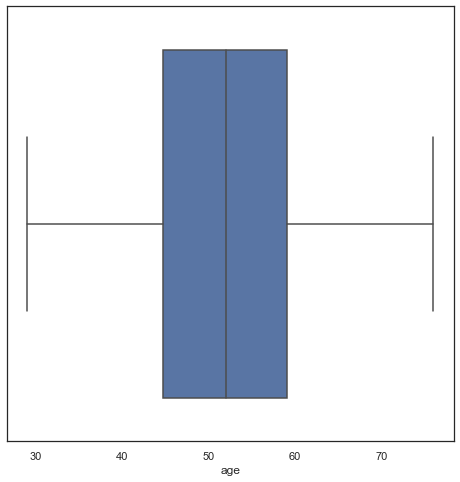

In [226]:
hd_test = hd[hd['target'] == "Sick"]
hd_test2 = hd[hd['target'] == "Healthy"]
# sns.boxplot(x=hd_test["age"], orient="v")
sns.boxplot(x=hd_test2["age"], orient="v")

age lower and upper 1.5*IQR and values outside this range is: 
 lower: 27.0	upper: 83.0 
value count: 0
resting_blood_pressure lower and upper 1.5*IQR and values outside this range is: 
 lower: 90.0	upper: 170.0 
value count: 7
cholesterol lower and upper 1.5*IQR and values outside this range is: 
 lower: 114.5	upper: 374.5 
value count: 5
max_heart_rate_achieved lower and upper 1.5*IQR and values outside this range is: 
 lower: 91.0	upper: 211.0 
value count: 2
ST_depression_induced_by_exercise lower and upper 1.5*IQR and values outside this range is: 
 lower: -2.7	upper: 4.5 
value count: 2


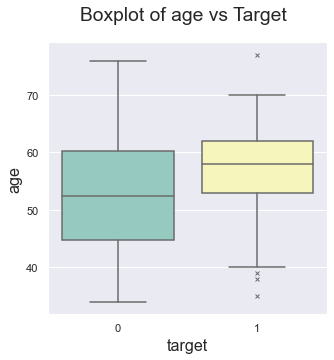

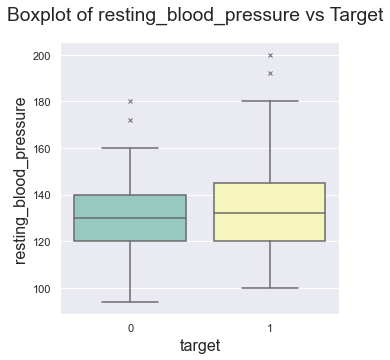

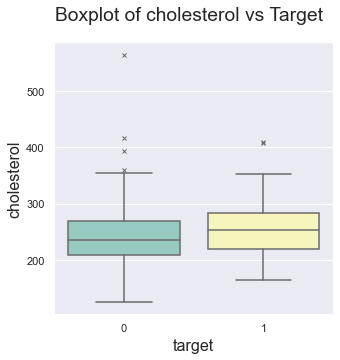

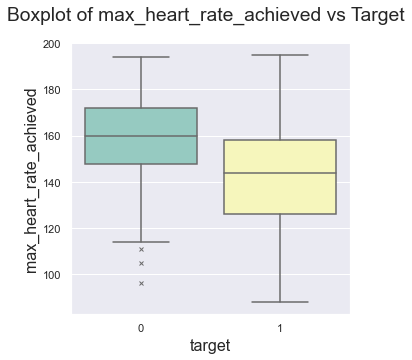

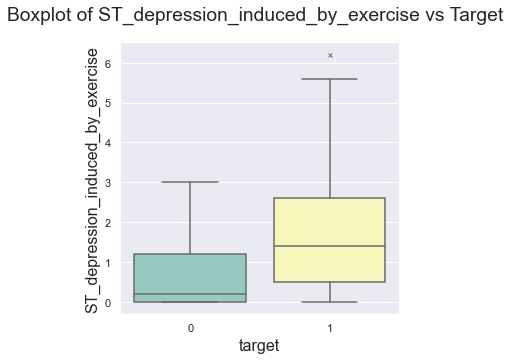

In [227]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.set_context(rc={"font.size":16,"axes.titlesize":18,"axes.labelsize":16})
for i in integerAttributesKey:
    plt.figure(i)
    sns.boxplot(x="target", y=i, data=hd_train, orient="v", palette="Set3", flierprops = dict(marker="x", markersize = 4))
    plt.suptitle(f"Boxplot of {i} vs Target")

    # Print IQR and ceiling floor values
    Q1 = hd_train[i].quantile(0.25)
    Q3 = hd_train[i].quantile(0.75)
    IQR = Q3 - Q1
    low_outliers = Q1 - 1.5 * IQR
    upper_outliers = Q3 + 1.5 * IQR
    number_of_outliers = hd_train[i][(hd_train[i] < low_outliers) | (hd_train[i] > upper_outliers)].count()
    print(f'{i} lower and upper 1.5*IQR and values outside this range is: \n lower: {low_outliers}\tupper: {upper_outliers} \nvalue count: {number_of_outliers}')

### Outlier Decision
Based on these results, there are not many outlier values. Given the box plot visualizations, the outliers are not deemed to be noise and will not be removed from the dataset.

We can also see a potential that:
- age and resting heart rate seem correlated with heart disease
- higher max heart rate is associated with individuals without heart diseases
- cholesterol doesn't have a significant impact
- when a participant had ST depression that is seen after exercise, they were more likely to suffer from heart disease

# Initial Visualizations
We can take a look at some visualizations to see if there are some interesting trends or hypothesis we can test. This will also give us an idea of which models we might want to test and which attributes we expect to have the most impact on our target.

From looking at the boxplots, we also know that our data is in different ranges and we will need to consider applying a normalization depending on the model we choose. We will do that later once we know which models we will try to run.


## Continuous Variables
We'll add some scatterplots and histograms to continue analyzing our numerical data.

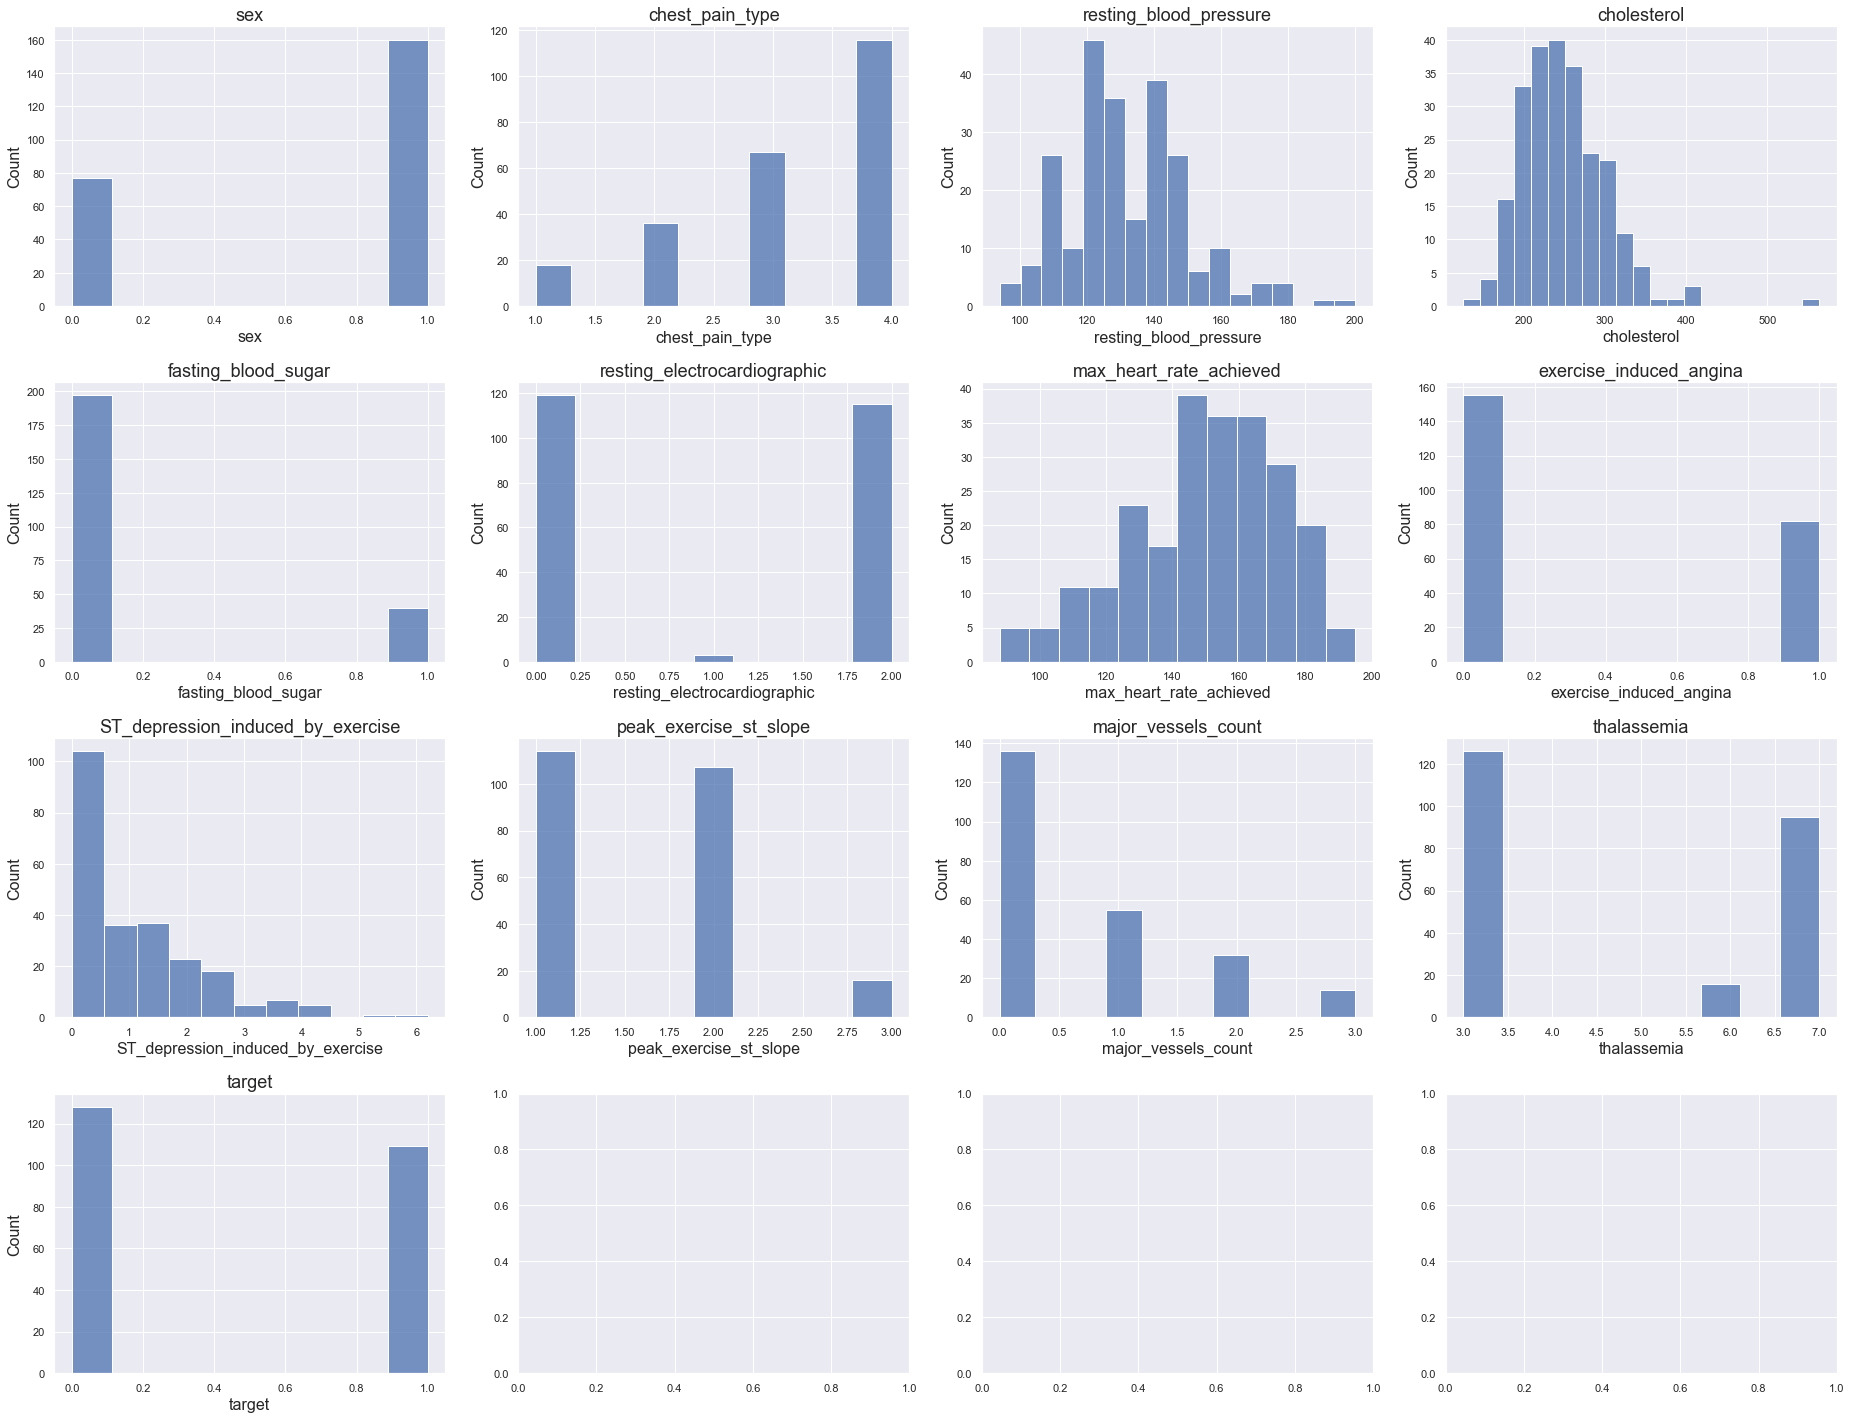

In [228]:

fig, axes = plt.subplots(4,4,figsize=(26,20))
# We will not plot country because it has too many categories.
for index, columnName in enumerate(hd_train.columns[1:]):
    ax = axes.reshape(-1)[index]
    if hd_train[columnName].dtype.kind == 'O':
        a = sns.countplot(x=columnName,data=hd_train,ax=ax)
    else:
        b = sns.histplot(x=columnName,data=hd_train,ax=ax)
    t = ax.set_title(columnName)
plt.tight_layout()

In [229]:
#TODO: Make this bigger
sns.set(rc = {'figure.figsize':(8,8)})

Text(0.5, 0.98, 'Pairwise Relationship Plots of Numerical Values - Target')

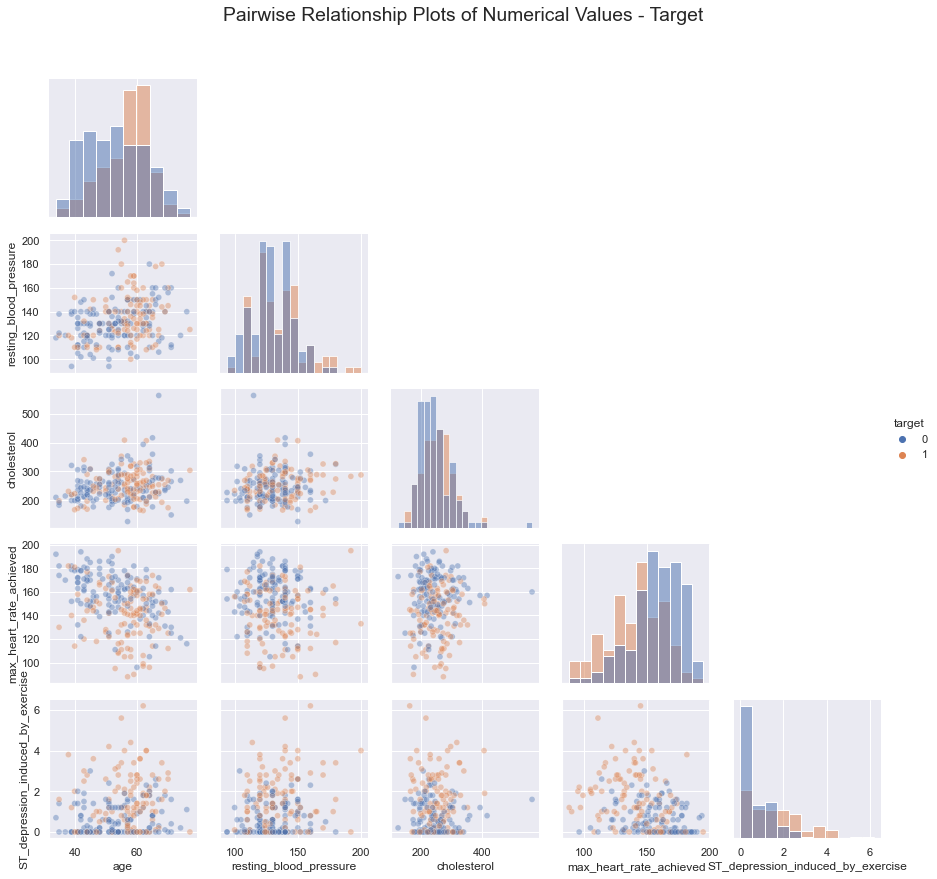

In [230]:
sns.set_context(rc={"font.size":16,"axes.titlesize":12,"axes.labelsize":12,})
pairwise_viz = sns.PairGrid(hd_train, vars=integerAttributesKey, hue="target", diag_sharey=False, corner=True)
pairwise_viz.map_lower(sns.scatterplot, alpha=0.4)
pairwise_viz.map_diag(sns.histplot)
pairwise_viz.add_legend()
pairwise_viz.fig.subplots_adjust(top=0.9)
pairwise_viz.fig.suptitle("Pairwise Relationship Plots of Numerical Values - Target")

It looks like there are a lot of individuals that had no ST depression induced by exercise (value of 0). It might be interesting to see how the target responds to those and without this value present. Let's dive into that.


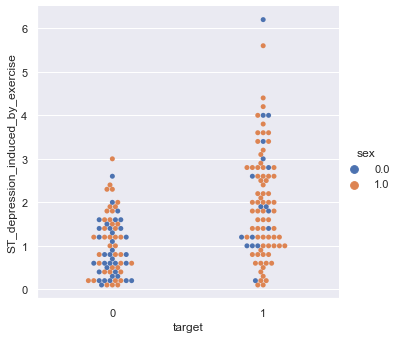

In [231]:
sns.catplot(x="target", y="ST_depression_induced_by_exercise", kind="swarm", hue="sex", data=hd_train[hd_train["ST_depression_induced_by_exercise"] != 0])

<AxesSubplot:xlabel='target', ylabel='count'>

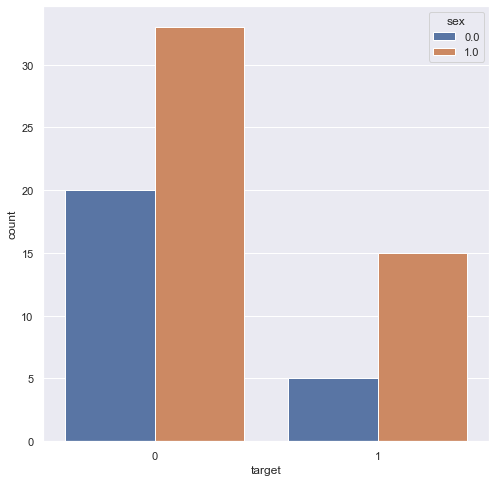

In [232]:
sns.countplot(x="target", hue="sex", data=hd_train[hd_train["ST_depression_induced_by_exercise"] == 0.0])

It looks like non-zero levels of ST depression induced by exercise are more prevalent in males, and those that have higher values have a greater tendency to have heart disease. We can also see that males with zero values have a greater chance of heart disease. Let's see what the absolute impact of sex on heart disease is.

<AxesSubplot:xlabel='target', ylabel='Density'>

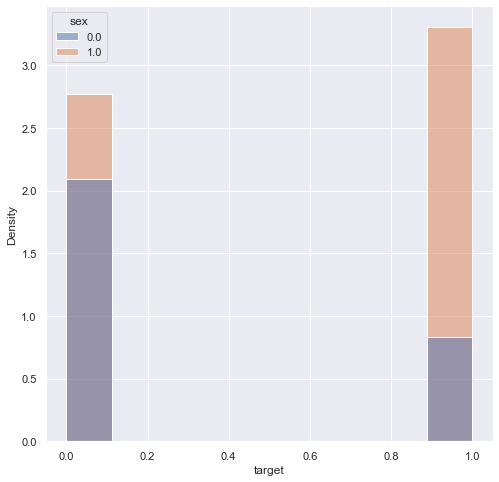

In [233]:
sns.histplot(x="target", stat="density", hue="sex", data=hd_train)

<AxesSubplot:xlabel='age', ylabel='Count'>

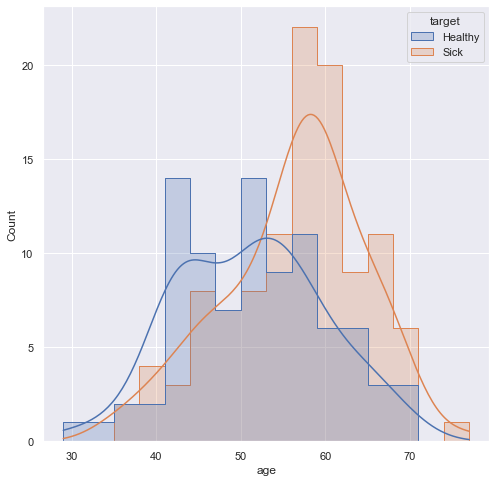

In [234]:
sns.histplot(hd[hd["sex"] == 1.0], x="age", hue="target", element="step", kde=True, binwidth=3)

It looks like our data is generally showing that males are more likely to have heart disease than females. Males with an average age of ~58 are more prone to heart disease.


We can take a look to see if we see any other interesting differences between males and females.
Although nothing jumps out at us, it does look like there is a bit of a "binning" of data for the resting blood pressure. We won't do anything about it at the moment. This may be a result of different methods of collecting blood pressure that resulted in a different level of precision.

In [235]:
# pairwise_viz = sns.PairGrid(hd_train[hd_train["target"]==1], vars=integerAttributesKey, hue="sex", diag_sharey=False, corner=True)
# pairwise_viz.map_lower(sns.scatterplot, alpha=0.4)
# pairwise_viz.map_diag(sns.histplot)
# pairwise_viz.add_legend()
# pairwise_viz.fig.subplots_adjust(top=0.9)
# pairwise_viz.fig.suptitle("Pairwise Relationship Plots of Numerical Values - Sex")

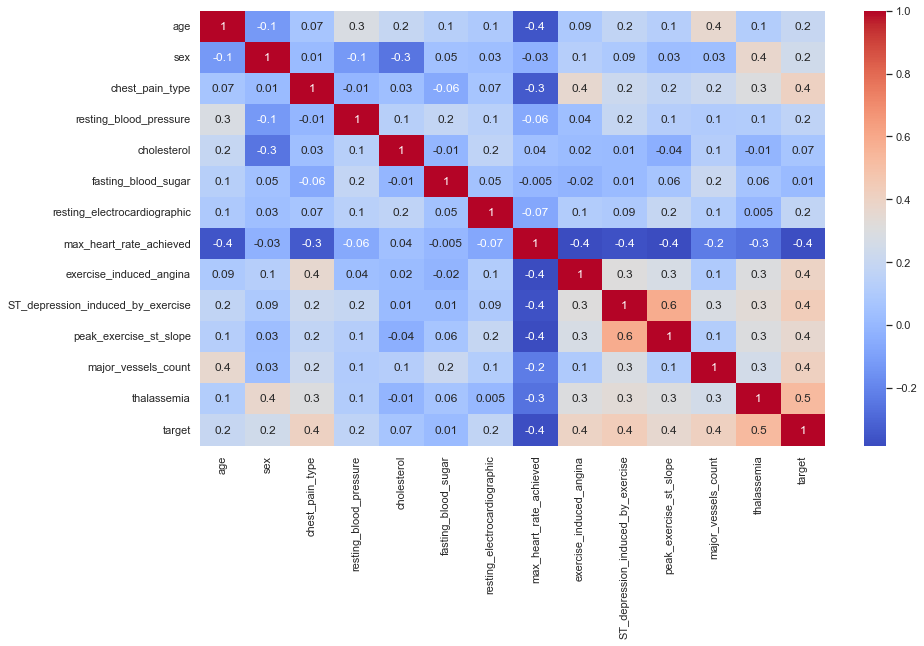

In [236]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = hd_train.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.1g')

In [237]:
# sns.set(rc = {'figure.figsize':(5,5)})
# sns.set_context(rc={"font.size":14,"axes.titlesize":10,"axes.labelsize":10})
# for i in objectAttributes:
#     plt.figure(i)
#     sns.catplot(x=i, kind="count", hue="sex", col="target", data=hd_train)
#     plt.suptitle(f"Boxplot of {i} vs Target")
#     plt.subplots_adjust(top=0.9)

# Visualization


In [238]:
# sns.countplot('sex', data=hd_train, hue='target')

# Fast Visualization

# Description of the attributes
1. age - age in years

2. sex - (1 = male; 0 = female)

3. cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5. chol - serum cholestoral in mg/dl

serum = LDL + hd_trainL + .2 * triglycerides

above 200 is cause for concern

6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

'>126' mg/dL signals diabetes

7. restecg - resting electrocardiographic results

0: Nothing to note

1: ST-T Wave abnormality

can range from mild symptoms to severe problems

signals non-normal heart beat

2: Possible or definite left ventricular hypertrophy

Enlarged heart's main pumping chamber

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11. slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart

12. ca - number of major vessels (0-3) colored by flourosopy

colored vessel means the doctor can see the blood passing through

the more blood movement the better (no clots)

13. thal - thalium stress result

1,3: normal

6: fixed defect: used to be defect but ok now

7: reversable defect: no proper blood movement when exercising

14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

It looks like ST_depression_induced_by_exercise has lots of 0's. Let's explore that to see how many.

In [239]:
print((hd_train['ST_depression_induced_by_exercise'] == 0).sum())

73


<AxesSubplot:xlabel='ST_depression_induced_by_exercise', ylabel='Count'>

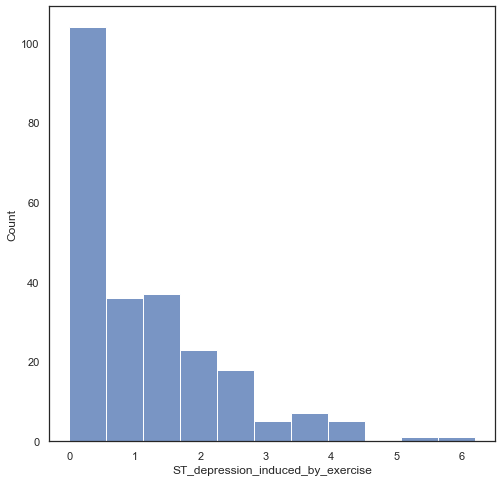

In [240]:
sns.histplot(x="ST_depression_induced_by_exercise",data=hd_train)

Based on research for what ST depression induced by exercise is, we find that it is a measure of change in an ECG reading after exercise. Subjects with a "0" are subjects that did not have any ST depression, where subjects with a non-zero value had some ST depression present. Thus, the "0" values will not be removed and will be considered correct. It could be interesting to come back and bin the data into a "yes/no" categorical for use in model building.

In [118]:
def missing_and_outliers_removal(training_dataset):
    """
    Function removes rows with missing values and outliers in cholestoral. This function should only be called on the training dataset.
    :param training_dataset: dataframe that will be used for training
    :return: datafram with missing values and outliers removed
    """
    training_dataset = training_dataset[training_dataset["cholesterol"]<450]
    training_dataset[training_dataset["major_vessels_count"] == "?"] = 0
    training_dataset[training_dataset["thalassemia"] == "?"] = 0
    return training_dataset

def impute_values(dataset):
    dataset[dataset["major_vessels_count"] == "?"] = 0
    dataset[dataset["thalassemia"] == "?"] = 0

def transformation(dataset):
    """
    Function adjusts skewness in max heart rate and resting blood pressure data
    :param dataset: dataframe that will be used for training or in prediction on data
    :return: dataframe with adjusted data
    """
    dataset["max_heart_rate_achieved"] = dataset["max_heart_rate_achieved"]**2
    dataset["resting_blood_pressure"] = dataset["resting_blood_pressure"]**0.5
    return dataset
def one_hot_encode(hd_train):
    #categorical data
    categorical_cols = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina']
    df = pd.get_dummies(hd_train, columns = categorical_cols)
    return df

In [41]:
# ## IMPORT TRAINING DATA
hdd = pd.read_csv('../data/processed/train', header=0, index_col=0)
hdd=missing_and_outliers_removal(hdd)
hdd=transformation(hdd)

hdd=one_hot_encode(hdd)

columns_to_keep = [x for x in range(hdd.shape[1]) if x not in [10]]
X = hdd.iloc[:,columns_to_keep]
y = hdd.iloc[:,10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# #
# ### TRAIN ALL MODELS -> Get results
#
# ## IMPORT TEST DATA


In [42]:
hdd.dtypes

age                                  float64
chest_pain_type                      float64
resting_blood_pressure               float64
cholesterol                          float64
resting_electrocardiographic         float64
max_heart_rate_achieved              float64
ST_depression_induced_by_exercise    float64
peak_exercise_st_slope               float64
major_vessels_count                   object
thalassemia                           object
target                                 int64
sex_0.0                                uint8
sex_1.0                                uint8
fasting_blood_sugar_0.0                uint8
fasting_blood_sugar_1.0                uint8
exercise_induced_angina_0.0            uint8
exercise_induced_angina_1.0            uint8
dtype: object

# Model Selection and building

# Feature Scaling

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Saving Model Result

In [82]:
results_df = pd.DataFrame(index=['Decision Tree'],
                          columns=['F-score (cv)', 'Precision (cv)','Recall (cv)', 'Accuracy (cv)'])
# res_df = pd.DataFrame(index=[''],
#                           columns=['F-score (cv)', 'Precision (cv)','Recall (cv)', 'Accuracy (cv)'])
# res_df

In [83]:
def confusion(true, pred):
    """
    Function for pretty printing confusion matrices
    """
    pred = pd.Series(pred)
    true = pd.Series(true)

    true.name = 'target'
    pred.name = 'predicted'
    cm = pd.crosstab(true.reset_index(drop=True), pred.reset_index(drop=True))
    cm = cm[cm.index]
    return cm

# Decision Tree Model Building

In [84]:
#without hyperparameter tuning
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred)*100,'%')
print(classification_report(y_test,y_pred))

[[23  3]
 [ 8 14]]
Accuracy: 77.08333333333334 %
              precision    recall  f1-score   support

           0       0.74      0.88      0.81        26
           1       0.82      0.64      0.72        22

    accuracy                           0.77        48
   macro avg       0.78      0.76      0.76        48
weighted avg       0.78      0.77      0.77        48



# Cross_Fold Validation

In [85]:
#cross fold validation without hyper tuning
cv = KFold(n_splits=10, random_state=42, shuffle=True)
clf = DecisionTreeClassifier()
cross_val_results = pd.DataFrame(cross_validate(clf, X_train, y_train, cv = cv,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Decision Tree',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df


,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Decision Tree,0.745746,0.748663,0.767046,0.759211


# Hyperparameter tuning of DT using RandomizedSearchCV
In RandomizedSearchCV,not all hyperparameter values are used. Instead, a fixed number of hyperparameters are sampled from specified probability distributions.The following hyperparameter are chosen for tuning:

"max_depth":[3,None]
max_depth: The maximum depth of the tree.The higher value of maximum depth causes overfitting, and a lower value causes underfitting. So, we set 3 to none.
"min_samples_leaf":randint(1,20),
min_samples_leaf: The minimum number of samples required to be at a leaf node. We set random value to be chosen from 1 to 20.
"criterion":["gini","entropy"]
criterion: The function to measure the quality of a split. We set both gini and entropy to choose the best one for this decision tree model.

In [86]:
#paramters setup for tuning
param={"max_depth":[3,None],"min_samples_leaf":randint(1,20),"criterion":["gini","entropy"]}
#"min_samples_split":randint(1,40)
#"min_samples_leaf":randint(1,20)

#instatiate decision tree classifier
clf = DecisionTreeClassifier()

#instatiate RandomizedSearchCV
clf_cv=RandomizedSearchCV(clf,param,cv=5)

#fitting the model
clf_cv.fit(X_train,y_train)

#print the tuned parameters and score
#print("Best: %f using %s" % (clf_cv.best_score_.mean(), clf_cv.best_params_))
#means = clf_cv.cv_results_['mean_test_score']
#stds = clf_cv.cv_results_['std_test_score']
#params = clf_cv.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))
#printing the confusion metrix
#y_pred=clf_cv.predict(X_test)
#print(confusion_matrix(y_test,y_pred))
cross_val_results = pd.DataFrame(cross_validate(clf_cv.best_estimator_ , X_train, y_train, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Decision Tree(Hyper Parameter Tuning)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Decision Tree(Hyper Parameter Tuning),0.757606,0.761227,0.760065,0.759244
Decision Tree,0.745746,0.748663,0.767046,0.759211


# LogisticRegression Model Building

In [87]:
# Training the Logistic Regression model on the Training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred) * 100, '%')
print(classification_report(y_test, y_pred))

[[22  4]
 [ 6 16]]
Accuracy: 79.16666666666666 %
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        26
           1       0.80      0.73      0.76        22

    accuracy                           0.79        48
   macro avg       0.79      0.79      0.79        48
weighted avg       0.79      0.79      0.79        48



In [88]:
#cross_fold validation without hyperparameter tuning
cv = KFold(n_splits=10, random_state=42, shuffle=True)
model = LogisticRegression()
#print(cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1).mean())
cross_val_results = pd.DataFrame(cross_validate(model, X_train, y_train, cv = cv,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Logistic Regression',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values


results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression,0.844961,0.846975,0.854591,0.853421
Decision Tree(Hyper Parameter Tuning),0.757606,0.761227,0.760065,0.759244
Decision Tree,0.745746,0.748663,0.767046,0.759211


# Hyperparameter tuning for logistic regression model
Here, we are using grid searching for parameter tuning.
The following hyperparameter are chosen for tuning: solver[‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
There are five solver used in sklearn. Each solver uses to find the parameter weights that minimize the cost function.
penalty[‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
Regularization addresses the problem of over-fitting by penalizing the parameters.
We set the four penalties. C [100, 10, 1.0, 0.1, 0.01]
The C parameter controls the penalty strength, which can also be effective.
max_iteration [20, 50, 100, 200, 500, 1000]
We set some random values in max_iteration to find out which iteration will be best for the solver to converge.

In [89]:
# define models and parameters
model = LogisticRegression()
solvers = ['lbfgs','newton-cg','liblinear','sag','saga']
penalty = ['l1', 'l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iteration= [20, 50, 100, 200, 500, 1000]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values,max_iter=max_iteration)
cv = KFold(n_splits=10, random_state=42, shuffle=True)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))
cross_val_results = pd.DataFrame(cross_validate(grid_result.best_estimator_ , X_train, y_train, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['LogisticRegression(Hyper Parameter Tuning)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/sit

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression,0.844961,0.846975,0.854591,0.853421
LogisticRegression(Hyper Parameter Tuning),0.818485,0.824515,0.81936,0.821457
Decision Tree(Hyper Parameter Tuning),0.757606,0.761227,0.760065,0.759244
Decision Tree,0.745746,0.748663,0.767046,0.759211


# Random Forest - First Version 1
This is a simple random forest with untuned parameters

- Explain: parameters used
- Output: coefficients
- Explain: Do coefficients make sense?

In [63]:
init_time=time()

rf = RandomForestClassifier(n_estimators=20, random_state=42, max_depth=4)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, rf_predicted)
print(cm)
print('Accuracy:', accuracy_score(y_test, rf_predicted)*100,'%')
print(classification_report(y_test,rf_predicted))
#print(timedelta(seconds=(time()-init_time)))

[[21  5]
 [ 7 15]]
Accuracy: 75.0 %
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        26
           1       0.75      0.68      0.71        22

    accuracy                           0.75        48
   macro avg       0.75      0.74      0.75        48
weighted avg       0.75      0.75      0.75        48



In [64]:
cross_val_results = pd.DataFrame(cross_validate(rf, X_train, y_train, cv = 5,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Random Forest',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

confusion(y_train,rf_predicted)
results_df

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Decision Tree,0.741833,0.745671,0.765364,0.753947
Decision Tree(Hyper Parameter Tuning),0.783587,0.790218,0.78458,0.78556
Logistic Regression,0.844961,0.846975,0.854591,0.853421
LogisticRegression(Hyper Parameter Tuning),0.818485,0.824515,0.81936,0.821457
Random Forest,0.793844,0.795921,0.795313,0.795547


# Random Forest with hyperparameter tuning

In [65]:
init_time=time()

model = RandomForestClassifier()
n_estimators = [10,40,100,200,500,1000]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [1,2,3,4,5,6,7,8,9,10]
criterion= ['gini', 'entropy']

# define grid search
grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, criterion=criterion)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv = KFold(n_splits=10, random_state=42, shuffle=True)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose = 10)
grid_result = grid_search.fit(X_train, y_train)

# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']

model_10CV = grid_result.fit(X_train, y_train)

print(timedelta(seconds=(time()-init_time)))

0:06:41.370746


In [66]:
cross_val_results = pd.DataFrame(cross_validate(model_10CV.best_estimator_ , X_train, y_train, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Random Forest(Hyper Parameter Tuning)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression,0.844961,0.846975,0.854591,0.853421
Random Forest(Hyper Parameter Tuning),0.840309,0.845125,0.839202,0.842645
LogisticRegression(Hyper Parameter Tuning),0.818485,0.824515,0.81936,0.821457
Random Forest,0.793844,0.795921,0.795313,0.795547
Decision Tree(Hyper Parameter Tuning),0.783587,0.790218,0.78458,0.78556
Decision Tree,0.741833,0.745671,0.765364,0.753947


# Neural Network Model

In [67]:
model_nnet = MLPClassifier(hidden_layer_sizes=[1],
                           alpha=0,
                           activation='logistic',
                           max_iter=200,
                           solver='lbfgs',random_state=42)
model_nnet.fit(X_train, y_train);

y_pred = model_nnet.predict(X_test)

print('Confusion matrix of the TRAIN dataset')
confusion(y_test, y_pred)

cross_val_results = pd.DataFrame(cross_validate(model_nnet , X_train, y_train, cv = 5,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['MLP[1]',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

Confusion matrix of the TRAIN dataset


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression,0.844961,0.846975,0.854591,0.853421
Random Forest(Hyper Parameter Tuning),0.840309,0.845125,0.839202,0.842645
LogisticRegression(Hyper Parameter Tuning),0.818485,0.824515,0.81936,0.821457
Random Forest,0.793844,0.795921,0.795313,0.795547
Decision Tree(Hyper Parameter Tuning),0.783587,0.790218,0.78458,0.78556
MLP[1],0.774521,0.794466,0.778655,0.779892
Decision Tree,0.741833,0.745671,0.765364,0.753947


In [ ]:
model_nnet.coefs_
model_nnet.intercepts_
# dataset = X.join(y)
# graphMLP(dataset.columns[1:], model_nnet.coefs_, model_nnet.intercepts_)
pred = pd.Series(y_pred)
true = pd.Series(y_train)

true.name = 'target'
pred.name = 'predicted'
cm = pd.crosstab(true.reset_index(drop=True), pred.reset_index(drop=True))
# cm = cm[cm.index]
cm

In [68]:
# changing the size of hidden layer

model_nnet = MLPClassifier(hidden_layer_sizes=[2,2,2],
                           alpha=0.001,
                           activation='logistic',
                           max_iter=1000,
                           solver='lbfgs',random_state=42)
model_nnet.fit(X_train,y_train);
print('Confusion matrix of the TRAIN dataset')
confusion(y_train,y_pred)

cross_val_results = pd.DataFrame(cross_validate(model_nnet , X_train, y_train, cv = 5,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['MLP[2,2,2]-alpha=0.001',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion matrix of the TRAIN dataset


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression,0.844961,0.846975,0.854591,0.853421
Random Forest(Hyper Parameter Tuning),0.840309,0.845125,0.839202,0.842645
LogisticRegression(Hyper Parameter Tuning),0.818485,0.824515,0.81936,0.821457
"MLP[2,2,2]-alpha=0.001",0.803984,0.807423,0.803954,0.806208
Random Forest,0.793844,0.795921,0.795313,0.795547
Decision Tree(Hyper Parameter Tuning),0.783587,0.790218,0.78458,0.78556
MLP[1],0.774521,0.794466,0.778655,0.779892
Decision Tree,0.741833,0.745671,0.765364,0.753947


# Neural Network with hyperparameter tuning

In [69]:
sizes = [2*i for i in range(1,5)]
sizes = sizes + [[2*i,2*i] for i in range(1,5)]
sizes = sizes + [[2*i,2*i, 2*i] for i in range(1,5)]

len(sizes), sizes


decays = [0.00001,0.0001,0.001,0.01,0.1,0.5,1]
len(decays), decays[:10]

(7, [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1])

In [70]:
init_time=time()
model_nnet = MLPClassifier(alpha=0,
                           activation='logistic',
                           max_iter=500,
                           solver='lbfgs',
                           random_state=42)

trc = GridSearchCV(estimator=model_nnet,
                   scoring=['f1_macro', 'precision_macro', 'recall_macro', 'accuracy'],
                   param_grid={'hidden_layer_sizes': sizes,
                              'alpha': decays},
                   cv=10,
                   return_train_score=True,
                   refit='f1_macro', verbose=1)

model_10CV = trc.fit(X_train, y_train)
print(timedelta(seconds=(time()-init_time)))

Fitting 10 folds for each of 84 candidates, totalling 840 fits
[CV 1/10; 1/84] START alpha=1e-05, hidden_layer_sizes=2.........................
[CV 1/10; 1/84] END alpha=1e-05, hidden_layer_sizes=2; accuracy: (train=0.895, test=0.850) f1_macro: (train=0.892, test=0.847) precision_macro: (train=0.910, test=0.854) recall_macro: (train=0.887, test=0.843) total time=   0.0s
[CV 2/10; 1/84] START alpha=1e-05, hidden_layer_sizes=2.........................
[CV 2/10; 1/84] END alpha=1e-05, hidden_layer_sizes=2; accuracy: (train=0.919, test=0.789) f1_macro: (train=0.917, test=0.774) precision_macro: (train=0.924, test=0.801) recall_macro: (train=0.914, test=0.767) total time=   0.0s
[CV 3/10; 1/84] START alpha=1e-05, hidden_layer_sizes=2.........................
[CV 3/10; 1/84] END alpha=1e-05, hidden_layer_sizes=2; accuracy: (train=0.919, test=0.842) f1_macro: (train=0.917, test=0.840) precision_macro: (train=0.924, test=0.839) recall_macro: (train=0.914, test=0.847) total time=   0.0s
[CV 4/1

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/10; 7/84] END alpha=1e-05, hidden_layer_sizes=[6, 6]; accuracy: (train=0.977, test=0.579) f1_macro: (train=0.977, test=0.568) precision_macro: (train=0.978, test=0.568) recall_macro: (train=0.976, test=0.568) total time=   0.1s
[CV 3/10; 7/84] START alpha=1e-05, hidden_layer_sizes=[6, 6]....................
[CV 3/10; 7/84] END alpha=1e-05, hidden_layer_sizes=[6, 6]; accuracy: (train=0.971, test=0.842) f1_macro: (train=0.971, test=0.840) precision_macro: (train=0.971, test=0.839) recall_macro: (train=0.970, test=0.847) total time=   0.1s
[CV 4/10; 7/84] START alpha=1e-05, hidden_layer_sizes=[6, 6]....................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/10; 7/84] END alpha=1e-05, hidden_layer_sizes=[6, 6]; accuracy: (train=0.965, test=0.737) f1_macro: (train=0.965, test=0.725) precision_macro: (train=0.965, test=0.732) recall_macro: (train=0.965, test=0.722) total time=   0.2s
[CV 5/10; 7/84] START alpha=1e-05, hidden_layer_sizes=[6, 6]....................
[CV 5/10; 7/84] END alpha=1e-05, hidden_layer_sizes=[6, 6]; accuracy: (train=0.948, test=0.842) f1_macro: (train=0.947, test=0.840) precision_macro: (train=0.953, test=0.847) recall_macro: (train=0.943, test=0.839) total time=   0.1s
[CV 6/10; 7/84] START alpha=1e-05, hidden_layer_sizes=[6, 6]....................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 6/10; 7/84] END alpha=1e-05, hidden_layer_sizes=[6, 6]; accuracy: (train=0.994, test=0.895) f1_macro: (train=0.994, test=0.892) precision_macro: (train=0.994, test=0.917) recall_macro: (train=0.995, test=0.889) total time=   0.2s
[CV 7/10; 7/84] START alpha=1e-05, hidden_layer_sizes=[6, 6]....................
[CV 7/10; 7/84] END alpha=1e-05, hidden_layer_sizes=[6, 6]; accuracy: (train=0.983, test=0.684) f1_macro: (train=0.982, test=0.676) precision_macro: (train=0.982, test=0.724) recall_macro: (train=0.983, test=0.694) total time=   0.1s
[CV 8/10; 7/84] START alpha=1e-05, hidden_layer_sizes=[6, 6]....................
[CV 8/10; 7/84] END alpha=1e-05, hidden_layer_sizes=[6, 6]; accuracy: (train=0.948, test=0.737) f1_macro: (train=0.947, test=0.734) precision_macro: (train=0.951, test=0.739) recall_macro: (train=0.944, test=0.733) total time=   0.1s
[CV 9/10; 7/84] START alpha=1e-05, hidden_layer_sizes=[6, 6]....................
[CV 9/10; 7/84] END alpha=1e-05, hidden_layer_sizes=[6,

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/10; 11/84] END alpha=1e-05, hidden_layer_sizes=[6, 6, 6]; accuracy: (train=0.977, test=0.842) f1_macro: (train=0.977, test=0.840) precision_macro: (train=0.978, test=0.839) recall_macro: (train=0.976, test=0.847) total time=   0.2s
[CV 5/10; 11/84] START alpha=1e-05, hidden_layer_sizes=[6, 6, 6]................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/10; 11/84] END alpha=1e-05, hidden_layer_sizes=[6, 6, 6]; accuracy: (train=1.000, test=0.895) f1_macro: (train=1.000, test=0.894) precision_macro: (train=1.000, test=0.894) recall_macro: (train=1.000, test=0.894) total time=   0.3s
[CV 6/10; 11/84] START alpha=1e-05, hidden_layer_sizes=[6, 6, 6]................
[CV 6/10; 11/84] END alpha=1e-05, hidden_layer_sizes=[6, 6, 6]; accuracy: (train=0.994, test=0.684) f1_macro: (train=0.994, test=0.676) precision_macro: (train=0.995, test=0.690) recall_macro: (train=0.994, test=0.678) total time=   0.2s
[CV 7/10; 11/84] START alpha=1e-05, hidden_layer_sizes=[6, 6, 6]................
[CV 7/10; 11/84] END alpha=1e-05, hidden_layer_sizes=[6, 6, 6]; accuracy: (train=0.977, test=0.789) f1_macro: (train=0.976, test=0.789) precision_macro: (train=0.978, test=0.789) recall_macro: (train=0.975, test=0.789) total time=   0.2s
[CV 8/10; 11/84] START alpha=1e-05, hidden_layer_sizes=[6, 6, 6]................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 8/10; 11/84] END alpha=1e-05, hidden_layer_sizes=[6, 6, 6]; accuracy: (train=0.988, test=0.737) f1_macro: (train=0.988, test=0.734) precision_macro: (train=0.990, test=0.739) recall_macro: (train=0.987, test=0.733) total time=   0.2s
[CV 9/10; 11/84] START alpha=1e-05, hidden_layer_sizes=[6, 6, 6]................
[CV 9/10; 11/84] END alpha=1e-05, hidden_layer_sizes=[6, 6, 6]; accuracy: (train=0.983, test=0.684) f1_macro: (train=0.982, test=0.683) precision_macro: (train=0.983, test=0.693) recall_macro: (train=0.982, test=0.689) total time=   0.1s
[CV 10/10; 11/84] START alpha=1e-05, hidden_layer_sizes=[6, 6, 6]...............
[CV 10/10; 11/84] END alpha=1e-05, hidden_layer_sizes=[6, 6, 6]; accuracy: (train=0.988, test=0.684) f1_macro: (train=0.988, test=0.676) precision_macro: (train=0.988, test=0.690) recall_macro: (train=0.988, test=0.678) total time=   0.1s
[CV 1/10; 12/84] START alpha=1e-05, hidden_layer_sizes=[8, 8, 8]................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/10; 12/84] END alpha=1e-05, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.936, test=0.850) f1_macro: (train=0.934, test=0.847) precision_macro: (train=0.947, test=0.854) recall_macro: (train=0.929, test=0.843) total time=   0.2s
[CV 2/10; 12/84] START alpha=1e-05, hidden_layer_sizes=[8, 8, 8]................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/10; 12/84] END alpha=1e-05, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.936, test=0.895) f1_macro: (train=0.935, test=0.887) precision_macro: (train=0.939, test=0.923) recall_macro: (train=0.933, test=0.875) total time=   0.2s
[CV 3/10; 12/84] START alpha=1e-05, hidden_layer_sizes=[8, 8, 8]................
[CV 3/10; 12/84] END alpha=1e-05, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.953, test=0.895) f1_macro: (train=0.953, test=0.894) precision_macro: (train=0.960, test=0.900) recall_macro: (train=0.949, test=0.909) total time=   0.2s
[CV 4/10; 12/84] START alpha=1e-05, hidden_layer_sizes=[8, 8, 8]................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/10; 12/84] END alpha=1e-05, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.953, test=0.789) f1_macro: (train=0.953, test=0.774) precision_macro: (train=0.958, test=0.801) recall_macro: (train=0.950, test=0.767) total time=   0.2s
[CV 5/10; 12/84] START alpha=1e-05, hidden_layer_sizes=[8, 8, 8]................
[CV 5/10; 12/84] END alpha=1e-05, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.930, test=0.842) f1_macro: (train=0.928, test=0.842) precision_macro: (train=0.943, test=0.844) recall_macro: (train=0.923, test=0.844) total time=   0.1s
[CV 6/10; 12/84] START alpha=1e-05, hidden_layer_sizes=[8, 8, 8]................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 6/10; 12/84] END alpha=1e-05, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.953, test=0.737) f1_macro: (train=0.953, test=0.734) precision_macro: (train=0.961, test=0.739) recall_macro: (train=0.949, test=0.733) total time=   0.2s
[CV 7/10; 12/84] START alpha=1e-05, hidden_layer_sizes=[8, 8, 8]................
[CV 7/10; 12/84] END alpha=1e-05, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.965, test=0.789) f1_macro: (train=0.965, test=0.784) precision_macro: (train=0.968, test=0.804) recall_macro: (train=0.963, test=0.783) total time=   0.2s
[CV 8/10; 12/84] START alpha=1e-05, hidden_layer_sizes=[8, 8, 8]................
[CV 8/10; 12/84] END alpha=1e-05, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.959, test=0.632) f1_macro: (train=0.959, test=0.632) precision_macro: (train=0.965, test=0.633) recall_macro: (train=0.955, test=0.633) total time=   0.1s
[CV 9/10; 12/84] START alpha=1e-05, hidden_layer_sizes=[8, 8, 8]................
[CV 9/10; 12/84] END alpha=1e-05, hidden_la

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 10/10; 12/84] END alpha=1e-05, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.953, test=0.737) f1_macro: (train=0.953, test=0.734) precision_macro: (train=0.958, test=0.739) recall_macro: (train=0.950, test=0.733) total time=   0.1s
[CV 1/10; 13/84] START alpha=0.0001, hidden_layer_sizes=2.......................
[CV 1/10; 13/84] END alpha=0.0001, hidden_layer_sizes=2; accuracy: (train=0.895, test=0.850) f1_macro: (train=0.892, test=0.847) precision_macro: (train=0.910, test=0.854) recall_macro: (train=0.887, test=0.843) total time=   0.0s
[CV 2/10; 13/84] START alpha=0.0001, hidden_layer_sizes=2.......................
[CV 2/10; 13/84] END alpha=0.0001, hidden_layer_sizes=2; accuracy: (train=0.919, test=0.789) f1_macro: (train=0.917, test=0.774) precision_macro: (train=0.924, test=0.801) recall_macro: (train=0.914, test=0.767) total time=   0.0s
[CV 3/10; 13/84] START alpha=0.0001, hidden_layer_sizes=2.......................
[CV 3/10; 13/84] END alpha=0.0001, hidden_layer_sizes=2;

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/10; 18/84] END alpha=0.0001, hidden_layer_sizes=[4, 4]; accuracy: (train=0.971, test=0.842) f1_macro: (train=0.971, test=0.840) precision_macro: (train=0.970, test=0.875) recall_macro: (train=0.972, test=0.850) total time=   0.1s
[CV 6/10; 18/84] START alpha=0.0001, hidden_layer_sizes=[4, 4]..................
[CV 6/10; 18/84] END alpha=0.0001, hidden_layer_sizes=[4, 4]; accuracy: (train=0.942, test=0.789) f1_macro: (train=0.942, test=0.789) precision_macro: (train=0.941, test=0.789) recall_macro: (train=0.944, test=0.789) total time=   0.0s
[CV 7/10; 18/84] START alpha=0.0001, hidden_layer_sizes=[4, 4]..................
[CV 7/10; 18/84] END alpha=0.0001, hidden_layer_sizes=[4, 4]; accuracy: (train=0.953, test=0.842) f1_macro: (train=0.953, test=0.840) precision_macro: (train=0.956, test=0.847) recall_macro: (train=0.951, test=0.839) total time=   0.1s
[CV 8/10; 18/84] START alpha=0.0001, hidden_layer_sizes=[4, 4]..................
[CV 8/10; 18/84] END alpha=0.0001, hidden_layer_s

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/10; 19/84] END alpha=0.0001, hidden_layer_sizes=[6, 6]; accuracy: (train=0.988, test=0.842) f1_macro: (train=0.988, test=0.835) precision_macro: (train=0.988, test=0.845) recall_macro: (train=0.988, test=0.830) total time=   0.1s
[CV 3/10; 19/84] START alpha=0.0001, hidden_layer_sizes=[6, 6]..................
[CV 3/10; 19/84] END alpha=0.0001, hidden_layer_sizes=[6, 6]; accuracy: (train=0.971, test=0.895) f1_macro: (train=0.971, test=0.892) precision_macro: (train=0.970, test=0.892) recall_macro: (train=0.971, test=0.892) total time=   0.2s
[CV 4/10; 19/84] START alpha=0.0001, hidden_layer_sizes=[6, 6]..................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/10; 19/84] END alpha=0.0001, hidden_layer_sizes=[6, 6]; accuracy: (train=0.959, test=0.737) f1_macro: (train=0.959, test=0.734) precision_macro: (train=0.959, test=0.733) recall_macro: (train=0.960, test=0.739) total time=   0.1s
[CV 5/10; 19/84] START alpha=0.0001, hidden_layer_sizes=[6, 6]..................
[CV 5/10; 19/84] END alpha=0.0001, hidden_layer_sizes=[6, 6]; accuracy: (train=0.977, test=0.789) f1_macro: (train=0.976, test=0.789) precision_macro: (train=0.980, test=0.789) recall_macro: (train=0.974, test=0.789) total time=   0.1s
[CV 6/10; 19/84] START alpha=0.0001, hidden_layer_sizes=[6, 6]..................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 6/10; 19/84] END alpha=0.0001, hidden_layer_sizes=[6, 6]; accuracy: (train=0.994, test=0.895) f1_macro: (train=0.994, test=0.892) precision_macro: (train=0.994, test=0.917) recall_macro: (train=0.995, test=0.889) total time=   0.2s
[CV 7/10; 19/84] START alpha=0.0001, hidden_layer_sizes=[6, 6]..................
[CV 7/10; 19/84] END alpha=0.0001, hidden_layer_sizes=[6, 6]; accuracy: (train=0.988, test=0.526) f1_macro: (train=0.988, test=0.504) precision_macro: (train=0.988, test=0.550) recall_macro: (train=0.989, test=0.539) total time=   0.1s
[CV 8/10; 19/84] START alpha=0.0001, hidden_layer_sizes=[6, 6]..................
[CV 8/10; 19/84] END alpha=0.0001, hidden_layer_sizes=[6, 6]; accuracy: (train=0.971, test=0.579) f1_macro: (train=0.970, test=0.578) precision_macro: (train=0.975, test=0.585) recall_macro: (train=0.968, test=0.583) total time=   0.1s
[CV 9/10; 19/84] START alpha=0.0001, hidden_layer_sizes=[6, 6]..................
[CV 9/10; 19/84] END alpha=0.0001, hidden_layer_s

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/10; 20/84] END alpha=0.0001, hidden_layer_sizes=[8, 8]; accuracy: (train=1.000, test=0.789) f1_macro: (train=1.000, test=0.784) precision_macro: (train=1.000, test=0.784) recall_macro: (train=1.000, test=0.784) total time=   0.0s
[CV 3/10; 20/84] START alpha=0.0001, hidden_layer_sizes=[8, 8]..................
[CV 3/10; 20/84] END alpha=0.0001, hidden_layer_sizes=[8, 8]; accuracy: (train=1.000, test=0.895) f1_macro: (train=1.000, test=0.894) precision_macro: (train=1.000, test=0.900) recall_macro: (train=1.000, test=0.909) total time=   0.0s
[CV 4/10; 20/84] START alpha=0.0001, hidden_layer_sizes=[8, 8]..................
[CV 4/10; 20/84] END alpha=0.0001, hidden_layer_sizes=[8, 8]; accuracy: (train=0.994, test=0.842) f1_macro: (train=0.994, test=0.835) precision_macro: (train=0.995, test=0.845) recall_macro: (train=0.994, test=0.830) total time=   0.0s
[CV 5/10; 20/84] START alpha=0.0001, hidden_layer_sizes=[8, 8]..................
[CV 5/10; 20/84] END alpha=0.0001, hidden_layer_s

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/10; 21/84] END alpha=0.0001, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.890, test=0.789) f1_macro: (train=0.888, test=0.784) precision_macro: (train=0.893, test=0.784) recall_macro: (train=0.885, test=0.784) total time=   0.0s
[CV 5/10; 21/84] START alpha=0.0001, hidden_layer_sizes=[2, 2, 2]...............
[CV 5/10; 21/84] END alpha=0.0001, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.890, test=0.895) f1_macro: (train=0.887, test=0.894) precision_macro: (train=0.899, test=0.909) recall_macro: (train=0.883, test=0.900) total time=   0.1s
[CV 6/10; 21/84] START alpha=0.0001, hidden_layer_sizes=[2, 2, 2]...............
[CV 6/10; 21/84] END alpha=0.0001, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.884, test=0.842) f1_macro: (train=0.882, test=0.835) precision_macro: (train=0.883, test=0.885) recall_macro: (train=0.882, test=0.833) total time=   0.1s
[CV 7/10; 21/84] START alpha=0.0001, hidden_layer_sizes=[2, 2, 2]...............
[CV 7/10; 21/84] END alpha=0.0001, hidde

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 10/10; 21/84] END alpha=0.0001, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.919, test=0.632) f1_macro: (train=0.918, test=0.627) precision_macro: (train=0.918, test=0.631) recall_macro: (train=0.918, test=0.628) total time=   0.2s
[CV 1/10; 22/84] START alpha=0.0001, hidden_layer_sizes=[4, 4, 4]...............
[CV 1/10; 22/84] END alpha=0.0001, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.947, test=0.800) f1_macro: (train=0.947, test=0.798) precision_macro: (train=0.951, test=0.846) recall_macro: (train=0.944, test=0.818) total time=   0.2s
[CV 2/10; 22/84] START alpha=0.0001, hidden_layer_sizes=[4, 4, 4]...............
[CV 2/10; 22/84] END alpha=0.0001, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.942, test=0.789) f1_macro: (train=0.941, test=0.774) precision_macro: (train=0.951, test=0.801) recall_macro: (train=0.937, test=0.767) total time=   0.1s
[CV 3/10; 22/84] START alpha=0.0001, hidden_layer_sizes=[4, 4, 4]...............
[CV 3/10; 22/84] END alpha=0.0001, hidd

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 8/10; 22/84] END alpha=0.0001, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.953, test=0.737) f1_macro: (train=0.953, test=0.725) precision_macro: (train=0.956, test=0.763) recall_macro: (train=0.951, test=0.728) total time=   0.2s
[CV 9/10; 22/84] START alpha=0.0001, hidden_layer_sizes=[4, 4, 4]...............
[CV 9/10; 22/84] END alpha=0.0001, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.907, test=0.684) f1_macro: (train=0.904, test=0.676) precision_macro: (train=0.919, test=0.690) recall_macro: (train=0.900, test=0.678) total time=   0.0s
[CV 10/10; 22/84] START alpha=0.0001, hidden_layer_sizes=[4, 4, 4]..............
[CV 10/10; 22/84] END alpha=0.0001, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.942, test=0.789) f1_macro: (train=0.941, test=0.784) precision_macro: (train=0.952, test=0.804) recall_macro: (train=0.936, test=0.783) total time=   0.1s
[CV 1/10; 23/84] START alpha=0.0001, hidden_layer_sizes=[6, 6, 6]...............
[CV 1/10; 23/84] END alpha=0.0001, hidd

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/10; 24/84] END alpha=0.0001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.959, test=0.900) f1_macro: (train=0.958, test=0.899) precision_macro: (train=0.963, test=0.899) recall_macro: (train=0.956, test=0.899) total time=   0.2s
[CV 2/10; 24/84] START alpha=0.0001, hidden_layer_sizes=[8, 8, 8]...............
[CV 2/10; 24/84] END alpha=0.0001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.977, test=0.789) f1_macro: (train=0.977, test=0.774) precision_macro: (train=0.977, test=0.801) recall_macro: (train=0.977, test=0.767) total time=   0.2s
[CV 3/10; 24/84] START alpha=0.0001, hidden_layer_sizes=[8, 8, 8]...............


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/10; 24/84] END alpha=0.0001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.930, test=0.842) f1_macro: (train=0.929, test=0.840) precision_macro: (train=0.943, test=0.839) recall_macro: (train=0.924, test=0.847) total time=   0.2s
[CV 4/10; 24/84] START alpha=0.0001, hidden_layer_sizes=[8, 8, 8]...............
[CV 4/10; 24/84] END alpha=0.0001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.977, test=0.632) f1_macro: (train=0.976, test=0.632) precision_macro: (train=0.979, test=0.648) recall_macro: (train=0.975, test=0.648) total time=   0.2s
[CV 5/10; 24/84] START alpha=0.0001, hidden_layer_sizes=[8, 8, 8]...............


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/10; 24/84] END alpha=0.0001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.965, test=0.789) f1_macro: (train=0.965, test=0.789) precision_macro: (train=0.970, test=0.789) recall_macro: (train=0.962, test=0.789) total time=   0.2s
[CV 6/10; 24/84] START alpha=0.0001, hidden_layer_sizes=[8, 8, 8]...............
[CV 6/10; 24/84] END alpha=0.0001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.959, test=0.737) f1_macro: (train=0.959, test=0.734) precision_macro: (train=0.963, test=0.739) recall_macro: (train=0.956, test=0.733) total time=   0.2s
[CV 7/10; 24/84] START alpha=0.0001, hidden_layer_sizes=[8, 8, 8]...............


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 7/10; 24/84] END alpha=0.0001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.988, test=0.842) f1_macro: (train=0.988, test=0.842) precision_macro: (train=0.988, test=0.844) recall_macro: (train=0.988, test=0.844) total time=   0.2s
[CV 8/10; 24/84] START alpha=0.0001, hidden_layer_sizes=[8, 8, 8]...............


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 8/10; 24/84] END alpha=0.0001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.977, test=0.684) f1_macro: (train=0.977, test=0.683) precision_macro: (train=0.977, test=0.683) recall_macro: (train=0.977, test=0.683) total time=   0.2s
[CV 9/10; 24/84] START alpha=0.0001, hidden_layer_sizes=[8, 8, 8]...............
[CV 9/10; 24/84] END alpha=0.0001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.942, test=0.789) f1_macro: (train=0.941, test=0.784) precision_macro: (train=0.946, test=0.804) recall_macro: (train=0.938, test=0.783) total time=   0.2s
[CV 10/10; 24/84] START alpha=0.0001, hidden_layer_sizes=[8, 8, 8]..............


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 10/10; 24/84] END alpha=0.0001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.965, test=0.737) f1_macro: (train=0.965, test=0.734) precision_macro: (train=0.970, test=0.739) recall_macro: (train=0.962, test=0.733) total time=   0.2s
[CV 1/10; 25/84] START alpha=0.001, hidden_layer_sizes=2........................
[CV 1/10; 25/84] END alpha=0.001, hidden_layer_sizes=2; accuracy: (train=0.895, test=0.900) f1_macro: (train=0.892, test=0.899) precision_macro: (train=0.910, test=0.899) recall_macro: (train=0.887, test=0.899) total time=   0.0s
[CV 2/10; 25/84] START alpha=0.001, hidden_layer_sizes=2........................
[CV 2/10; 25/84] END alpha=0.001, hidden_layer_sizes=2; accuracy: (train=0.919, test=0.789) f1_macro: (train=0.917, test=0.774) precision_macro: (train=0.924, test=0.801) recall_macro: (train=0.914, test=0.767) total time=   0.0s
[CV 3/10; 25/84] START alpha=0.001, hidden_layer_sizes=2........................
[CV 3/10; 25/84] END alpha=0.001, hidden_layer_sizes=2; a

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 9/10; 26/84] END alpha=0.001, hidden_layer_sizes=4; accuracy: (train=0.983, test=0.579) f1_macro: (train=0.982, test=0.568) precision_macro: (train=0.983, test=0.577) recall_macro: (train=0.982, test=0.572) total time=   0.1s
[CV 10/10; 26/84] START alpha=0.001, hidden_layer_sizes=4.......................
[CV 10/10; 26/84] END alpha=0.001, hidden_layer_sizes=4; accuracy: (train=0.959, test=0.579) f1_macro: (train=0.959, test=0.568) precision_macro: (train=0.959, test=0.577) recall_macro: (train=0.958, test=0.572) total time=   0.0s
[CV 1/10; 27/84] START alpha=0.001, hidden_layer_sizes=6........................
[CV 1/10; 27/84] END alpha=0.001, hidden_layer_sizes=6; accuracy: (train=0.994, test=0.850) f1_macro: (train=0.994, test=0.850) precision_macro: (train=0.995, test=0.850) recall_macro: (train=0.994, test=0.854) total time=   0.0s
[CV 2/10; 27/84] START alpha=0.001, hidden_layer_sizes=6........................
[CV 2/10; 27/84] END alpha=0.001, hidden_layer_sizes=6; accuracy: 

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 6/10; 29/84] END alpha=0.001, hidden_layer_sizes=[2, 2]; accuracy: (train=0.924, test=0.895) f1_macro: (train=0.923, test=0.892) precision_macro: (train=0.929, test=0.917) recall_macro: (train=0.920, test=0.889) total time=   0.1s
[CV 7/10; 29/84] START alpha=0.001, hidden_layer_sizes=[2, 2]...................
[CV 7/10; 29/84] END alpha=0.001, hidden_layer_sizes=[2, 2]; accuracy: (train=0.919, test=0.789) f1_macro: (train=0.917, test=0.789) precision_macro: (train=0.928, test=0.789) recall_macro: (train=0.912, test=0.789) total time=   0.1s
[CV 8/10; 29/84] START alpha=0.001, hidden_layer_sizes=[2, 2]...................
[CV 8/10; 29/84] END alpha=0.001, hidden_layer_sizes=[2, 2]; accuracy: (train=0.913, test=0.684) f1_macro: (train=0.912, test=0.683) precision_macro: (train=0.914, test=0.693) recall_macro: (train=0.910, test=0.689) total time=   0.1s
[CV 9/10; 29/84] START alpha=0.001, hidden_layer_sizes=[2, 2]...................
[CV 9/10; 29/84] END alpha=0.001, hidden_layer_sizes

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/10; 30/84] END alpha=0.001, hidden_layer_sizes=[4, 4]; accuracy: (train=0.994, test=0.900) f1_macro: (train=0.994, test=0.899) precision_macro: (train=0.994, test=0.899) recall_macro: (train=0.995, test=0.899) total time=   0.1s
[CV 2/10; 30/84] START alpha=0.001, hidden_layer_sizes=[4, 4]...................
[CV 2/10; 30/84] END alpha=0.001, hidden_layer_sizes=[4, 4]; accuracy: (train=1.000, test=0.684) f1_macro: (train=1.000, test=0.676) precision_macro: (train=1.000, test=0.676) recall_macro: (train=1.000, test=0.676) total time=   0.1s
[CV 3/10; 30/84] START alpha=0.001, hidden_layer_sizes=[4, 4]...................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/10; 30/84] END alpha=0.001, hidden_layer_sizes=[4, 4]; accuracy: (train=0.983, test=0.895) f1_macro: (train=0.982, test=0.894) precision_macro: (train=0.983, test=0.900) recall_macro: (train=0.982, test=0.909) total time=   0.1s
[CV 4/10; 30/84] START alpha=0.001, hidden_layer_sizes=[4, 4]...................
[CV 4/10; 30/84] END alpha=0.001, hidden_layer_sizes=[4, 4]; accuracy: (train=0.971, test=0.947) f1_macro: (train=0.971, test=0.945) precision_macro: (train=0.971, test=0.958) recall_macro: (train=0.970, test=0.938) total time=   0.1s
[CV 5/10; 30/84] START alpha=0.001, hidden_layer_sizes=[4, 4]...................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/10; 30/84] END alpha=0.001, hidden_layer_sizes=[4, 4]; accuracy: (train=0.994, test=0.842) f1_macro: (train=0.994, test=0.840) precision_macro: (train=0.994, test=0.875) recall_macro: (train=0.995, test=0.850) total time=   0.1s
[CV 6/10; 30/84] START alpha=0.001, hidden_layer_sizes=[4, 4]...................
[CV 6/10; 30/84] END alpha=0.001, hidden_layer_sizes=[4, 4]; accuracy: (train=1.000, test=0.842) f1_macro: (train=1.000, test=0.842) precision_macro: (train=1.000, test=0.844) recall_macro: (train=1.000, test=0.844) total time=   0.1s
[CV 7/10; 30/84] START alpha=0.001, hidden_layer_sizes=[4, 4]...................
[CV 7/10; 30/84] END alpha=0.001, hidden_layer_sizes=[4, 4]; accuracy: (train=0.983, test=0.632) f1_macro: (train=0.982, test=0.614) precision_macro: (train=0.985, test=0.641) recall_macro: (train=0.981, test=0.622) total time=   0.1s
[CV 8/10; 30/84] START alpha=0.001, hidden_layer_sizes=[4, 4]...................
[CV 8/10; 30/84] END alpha=0.001, hidden_layer_sizes

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 10/10; 30/84] END alpha=0.001, hidden_layer_sizes=[4, 4]; accuracy: (train=1.000, test=0.632) f1_macro: (train=1.000, test=0.614) precision_macro: (train=1.000, test=0.641) recall_macro: (train=1.000, test=0.622) total time=   0.1s
[CV 1/10; 31/84] START alpha=0.001, hidden_layer_sizes=[6, 6]...................
[CV 1/10; 31/84] END alpha=0.001, hidden_layer_sizes=[6, 6]; accuracy: (train=1.000, test=0.700) f1_macro: (train=1.000, test=0.700) precision_macro: (train=1.000, test=0.707) recall_macro: (train=1.000, test=0.707) total time=   0.1s
[CV 2/10; 31/84] START alpha=0.001, hidden_layer_sizes=[6, 6]...................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/10; 31/84] END alpha=0.001, hidden_layer_sizes=[6, 6]; accuracy: (train=1.000, test=0.789) f1_macro: (train=1.000, test=0.784) precision_macro: (train=1.000, test=0.784) recall_macro: (train=1.000, test=0.784) total time=   0.1s
[CV 3/10; 31/84] START alpha=0.001, hidden_layer_sizes=[6, 6]...................
[CV 3/10; 31/84] END alpha=0.001, hidden_layer_sizes=[6, 6]; accuracy: (train=1.000, test=0.842) f1_macro: (train=1.000, test=0.840) precision_macro: (train=1.000, test=0.839) recall_macro: (train=1.000, test=0.847) total time=   0.1s
[CV 4/10; 31/84] START alpha=0.001, hidden_layer_sizes=[6, 6]...................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/10; 31/84] END alpha=0.001, hidden_layer_sizes=[6, 6]; accuracy: (train=1.000, test=0.737) f1_macro: (train=1.000, test=0.737) precision_macro: (train=1.000, test=0.756) recall_macro: (train=1.000, test=0.756) total time=   0.1s
[CV 5/10; 31/84] START alpha=0.001, hidden_layer_sizes=[6, 6]...................
[CV 5/10; 31/84] END alpha=0.001, hidden_layer_sizes=[6, 6]; accuracy: (train=1.000, test=0.842) f1_macro: (train=1.000, test=0.840) precision_macro: (train=1.000, test=0.875) recall_macro: (train=1.000, test=0.850) total time=   0.1s
[CV 6/10; 31/84] START alpha=0.001, hidden_layer_sizes=[6, 6]...................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 6/10; 31/84] END alpha=0.001, hidden_layer_sizes=[6, 6]; accuracy: (train=0.994, test=0.895) f1_macro: (train=0.994, test=0.892) precision_macro: (train=0.994, test=0.917) recall_macro: (train=0.995, test=0.889) total time=   0.1s
[CV 7/10; 31/84] START alpha=0.001, hidden_layer_sizes=[6, 6]...................
[CV 7/10; 31/84] END alpha=0.001, hidden_layer_sizes=[6, 6]; accuracy: (train=1.000, test=0.737) f1_macro: (train=1.000, test=0.734) precision_macro: (train=1.000, test=0.739) recall_macro: (train=1.000, test=0.733) total time=   0.1s
[CV 8/10; 31/84] START alpha=0.001, hidden_layer_sizes=[6, 6]...................
[CV 8/10; 31/84] END alpha=0.001, hidden_layer_sizes=[6, 6]; accuracy: (train=1.000, test=0.684) f1_macro: (train=1.000, test=0.683) precision_macro: (train=1.000, test=0.683) recall_macro: (train=1.000, test=0.683) total time=   0.1s
[CV 9/10; 31/84] START alpha=0.001, hidden_layer_sizes=[6, 6]...................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 9/10; 31/84] END alpha=0.001, hidden_layer_sizes=[6, 6]; accuracy: (train=0.994, test=0.842) f1_macro: (train=0.994, test=0.842) precision_macro: (train=0.995, test=0.844) recall_macro: (train=0.994, test=0.844) total time=   0.1s
[CV 10/10; 31/84] START alpha=0.001, hidden_layer_sizes=[6, 6]..................
[CV 10/10; 31/84] END alpha=0.001, hidden_layer_sizes=[6, 6]; accuracy: (train=0.988, test=0.737) f1_macro: (train=0.988, test=0.734) precision_macro: (train=0.988, test=0.739) recall_macro: (train=0.988, test=0.733) total time=   0.1s
[CV 1/10; 32/84] START alpha=0.001, hidden_layer_sizes=[8, 8]...................
[CV 1/10; 32/84] END alpha=0.001, hidden_layer_sizes=[8, 8]; accuracy: (train=1.000, test=0.850) f1_macro: (train=1.000, test=0.847) precision_macro: (train=1.000, test=0.854) recall_macro: (train=1.000, test=0.843) total time=   0.0s
[CV 2/10; 32/84] START alpha=0.001, hidden_layer_sizes=[8, 8]...................
[CV 2/10; 32/84] END alpha=0.001, hidden_layer_size

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/10; 33/84] END alpha=0.001, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.924, test=0.842) f1_macro: (train=0.924, test=0.835) precision_macro: (train=0.925, test=0.845) recall_macro: (train=0.922, test=0.830) total time=   0.2s
[CV 3/10; 33/84] START alpha=0.001, hidden_layer_sizes=[2, 2, 2]................
[CV 3/10; 33/84] END alpha=0.001, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.919, test=0.842) f1_macro: (train=0.917, test=0.840) precision_macro: (train=0.927, test=0.839) recall_macro: (train=0.913, test=0.847) total time=   0.2s
[CV 4/10; 33/84] START alpha=0.001, hidden_layer_sizes=[2, 2, 2]................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/10; 33/84] END alpha=0.001, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.890, test=0.737) f1_macro: (train=0.888, test=0.725) precision_macro: (train=0.893, test=0.732) recall_macro: (train=0.885, test=0.722) total time=   0.1s
[CV 5/10; 33/84] START alpha=0.001, hidden_layer_sizes=[2, 2, 2]................
[CV 5/10; 33/84] END alpha=0.001, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.901, test=0.947) f1_macro: (train=0.899, test=0.947) precision_macro: (train=0.911, test=0.950) recall_macro: (train=0.894, test=0.950) total time=   0.2s
[CV 6/10; 33/84] START alpha=0.001, hidden_layer_sizes=[2, 2, 2]................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 6/10; 33/84] END alpha=0.001, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.901, test=0.737) f1_macro: (train=0.900, test=0.725) precision_macro: (train=0.900, test=0.763) recall_macro: (train=0.901, test=0.728) total time=   0.2s
[CV 7/10; 33/84] START alpha=0.001, hidden_layer_sizes=[2, 2, 2]................
[CV 7/10; 33/84] END alpha=0.001, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.930, test=0.737) f1_macro: (train=0.929, test=0.737) precision_macro: (train=0.937, test=0.739) recall_macro: (train=0.925, test=0.739) total time=   0.2s
[CV 8/10; 33/84] START alpha=0.001, hidden_layer_sizes=[2, 2, 2]................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 8/10; 33/84] END alpha=0.001, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.913, test=0.632) f1_macro: (train=0.911, test=0.614) precision_macro: (train=0.923, test=0.641) recall_macro: (train=0.906, test=0.622) total time=   0.2s
[CV 9/10; 33/84] START alpha=0.001, hidden_layer_sizes=[2, 2, 2]................
[CV 9/10; 33/84] END alpha=0.001, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.907, test=0.737) f1_macro: (train=0.904, test=0.737) precision_macro: (train=0.919, test=0.739) recall_macro: (train=0.900, test=0.739) total time=   0.2s
[CV 10/10; 33/84] START alpha=0.001, hidden_layer_sizes=[2, 2, 2]...............


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 10/10; 33/84] END alpha=0.001, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.919, test=0.632) f1_macro: (train=0.918, test=0.627) precision_macro: (train=0.918, test=0.631) recall_macro: (train=0.918, test=0.628) total time=   0.2s
[CV 1/10; 34/84] START alpha=0.001, hidden_layer_sizes=[4, 4, 4]................
[CV 1/10; 34/84] END alpha=0.001, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.971, test=0.800) f1_macro: (train=0.971, test=0.800) precision_macro: (train=0.970, test=0.808) recall_macro: (train=0.972, test=0.808) total time=   0.2s
[CV 2/10; 34/84] START alpha=0.001, hidden_layer_sizes=[4, 4, 4]................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/10; 34/84] END alpha=0.001, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.983, test=0.737) f1_macro: (train=0.982, test=0.725) precision_macro: (train=0.982, test=0.732) recall_macro: (train=0.983, test=0.722) total time=   0.2s
[CV 3/10; 34/84] START alpha=0.001, hidden_layer_sizes=[4, 4, 4]................
[CV 3/10; 34/84] END alpha=0.001, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.988, test=0.789) f1_macro: (train=0.988, test=0.789) precision_macro: (train=0.989, test=0.794) recall_macro: (train=0.987, test=0.801) total time=   0.2s
[CV 4/10; 34/84] START alpha=0.001, hidden_layer_sizes=[4, 4, 4]................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/10; 34/84] END alpha=0.001, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.942, test=0.684) f1_macro: (train=0.941, test=0.661) precision_macro: (train=0.951, test=0.679) recall_macro: (train=0.937, test=0.659) total time=   0.2s
[CV 5/10; 34/84] START alpha=0.001, hidden_layer_sizes=[4, 4, 4]................
[CV 5/10; 34/84] END alpha=0.001, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.971, test=0.789) f1_macro: (train=0.971, test=0.789) precision_macro: (train=0.971, test=0.801) recall_macro: (train=0.970, test=0.794) total time=   0.2s
[CV 6/10; 34/84] START alpha=0.001, hidden_layer_sizes=[4, 4, 4]................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 6/10; 34/84] END alpha=0.001, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.983, test=0.789) f1_macro: (train=0.982, test=0.784) precision_macro: (train=0.981, test=0.804) recall_macro: (train=0.984, test=0.783) total time=   0.2s
[CV 7/10; 34/84] START alpha=0.001, hidden_layer_sizes=[4, 4, 4]................
[CV 7/10; 34/84] END alpha=0.001, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.953, test=0.684) f1_macro: (train=0.953, test=0.683) precision_macro: (train=0.953, test=0.693) recall_macro: (train=0.953, test=0.689) total time=   0.2s
[CV 8/10; 34/84] START alpha=0.001, hidden_layer_sizes=[4, 4, 4]................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 8/10; 34/84] END alpha=0.001, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=1.000, test=0.684) f1_macro: (train=1.000, test=0.676) precision_macro: (train=1.000, test=0.690) recall_macro: (train=1.000, test=0.678) total time=   0.2s
[CV 9/10; 34/84] START alpha=0.001, hidden_layer_sizes=[4, 4, 4]................
[CV 9/10; 34/84] END alpha=0.001, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=1.000, test=0.737) f1_macro: (train=1.000, test=0.734) precision_macro: (train=1.000, test=0.739) recall_macro: (train=1.000, test=0.733) total time=   0.2s
[CV 10/10; 34/84] START alpha=0.001, hidden_layer_sizes=[4, 4, 4]...............


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 10/10; 34/84] END alpha=0.001, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.994, test=0.632) f1_macro: (train=0.994, test=0.627) precision_macro: (train=0.995, test=0.631) recall_macro: (train=0.994, test=0.628) total time=   0.2s
[CV 1/10; 35/84] START alpha=0.001, hidden_layer_sizes=[6, 6, 6]................
[CV 1/10; 35/84] END alpha=0.001, hidden_layer_sizes=[6, 6, 6]; accuracy: (train=1.000, test=0.700) f1_macro: (train=1.000, test=0.697) precision_macro: (train=1.000, test=0.736) recall_macro: (train=1.000, test=0.717) total time=   0.1s
[CV 2/10; 35/84] START alpha=0.001, hidden_layer_sizes=[6, 6, 6]................
[CV 2/10; 35/84] END alpha=0.001, hidden_layer_sizes=[6, 6, 6]; accuracy: (train=1.000, test=0.842) f1_macro: (train=1.000, test=0.835) precision_macro: (train=1.000, test=0.845) recall_macro: (train=1.000, test=0.830) total time=   0.1s
[CV 3/10; 35/84] START alpha=0.001, hidden_layer_sizes=[6, 6, 6]................
[CV 3/10; 35/84] END alpha=0.001, hidden_l

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/10; 36/84] END alpha=0.001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=0.988, test=0.842) f1_macro: (train=0.988, test=0.842) precision_macro: (train=0.989, test=0.864) recall_macro: (train=0.987, test=0.864) total time=   0.2s
[CV 4/10; 36/84] START alpha=0.001, hidden_layer_sizes=[8, 8, 8]................
[CV 4/10; 36/84] END alpha=0.001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=1.000, test=0.789) f1_macro: (train=1.000, test=0.774) precision_macro: (train=1.000, test=0.801) recall_macro: (train=1.000, test=0.767) total time=   0.1s
[CV 5/10; 36/84] START alpha=0.001, hidden_layer_sizes=[8, 8, 8]................
[CV 5/10; 36/84] END alpha=0.001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=1.000, test=0.947) f1_macro: (train=1.000, test=0.947) precision_macro: (train=1.000, test=0.950) recall_macro: (train=1.000, test=0.950) total time=   0.2s
[CV 6/10; 36/84] START alpha=0.001, hidden_layer_sizes=[8, 8, 8]................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 6/10; 36/84] END alpha=0.001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=1.000, test=0.789) f1_macro: (train=1.000, test=0.784) precision_macro: (train=1.000, test=0.804) recall_macro: (train=1.000, test=0.783) total time=   0.2s
[CV 7/10; 36/84] START alpha=0.001, hidden_layer_sizes=[8, 8, 8]................
[CV 7/10; 36/84] END alpha=0.001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=1.000, test=0.684) f1_macro: (train=1.000, test=0.676) precision_macro: (train=1.000, test=0.724) recall_macro: (train=1.000, test=0.694) total time=   0.1s
[CV 8/10; 36/84] START alpha=0.001, hidden_layer_sizes=[8, 8, 8]................
[CV 8/10; 36/84] END alpha=0.001, hidden_layer_sizes=[8, 8, 8]; accuracy: (train=1.000, test=0.579) f1_macro: (train=1.000, test=0.568) precision_macro: (train=1.000, test=0.577) recall_macro: (train=1.000, test=0.572) total time=   0.1s
[CV 9/10; 36/84] START alpha=0.001, hidden_layer_sizes=[8, 8, 8]................
[CV 9/10; 36/84] END alpha=0.001, hidden_la

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/10; 42/84] END alpha=0.01, hidden_layer_sizes=[4, 4]; accuracy: (train=0.994, test=0.737) f1_macro: (train=0.994, test=0.734) precision_macro: (train=0.995, test=0.733) recall_macro: (train=0.994, test=0.739) total time=   0.1s
[CV 5/10; 42/84] START alpha=0.01, hidden_layer_sizes=[4, 4]....................
[CV 5/10; 42/84] END alpha=0.01, hidden_layer_sizes=[4, 4]; accuracy: (train=0.994, test=0.789) f1_macro: (train=0.994, test=0.789) precision_macro: (train=0.994, test=0.801) recall_macro: (train=0.995, test=0.794) total time=   0.1s
[CV 6/10; 42/84] START alpha=0.01, hidden_layer_sizes=[4, 4]....................
[CV 6/10; 42/84] END alpha=0.01, hidden_layer_sizes=[4, 4]; accuracy: (train=1.000, test=0.895) f1_macro: (train=1.000, test=0.894) precision_macro: (train=1.000, test=0.894) recall_macro: (train=1.000, test=0.894) total time=   0.1s
[CV 7/10; 42/84] START alpha=0.01, hidden_layer_sizes=[4, 4]....................
[CV 7/10; 42/84] END alpha=0.01, hidden_layer_sizes=[4,

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/10; 43/84] END alpha=0.01, hidden_layer_sizes=[6, 6]; accuracy: (train=1.000, test=0.800) f1_macro: (train=1.000, test=0.798) precision_macro: (train=1.000, test=0.798) recall_macro: (train=1.000, test=0.798) total time=   0.1s
[CV 2/10; 43/84] START alpha=0.01, hidden_layer_sizes=[6, 6]....................
[CV 2/10; 43/84] END alpha=0.01, hidden_layer_sizes=[6, 6]; accuracy: (train=1.000, test=0.789) f1_macro: (train=1.000, test=0.774) precision_macro: (train=1.000, test=0.801) recall_macro: (train=1.000, test=0.767) total time=   0.1s
[CV 3/10; 43/84] START alpha=0.01, hidden_layer_sizes=[6, 6]....................
[CV 3/10; 43/84] END alpha=0.01, hidden_layer_sizes=[6, 6]; accuracy: (train=1.000, test=0.789) f1_macro: (train=1.000, test=0.789) precision_macro: (train=1.000, test=0.794) recall_macro: (train=1.000, test=0.801) total time=   0.1s
[CV 4/10; 43/84] START alpha=0.01, hidden_layer_sizes=[6, 6]....................
[CV 4/10; 43/84] END alpha=0.01, hidden_layer_sizes=[6,

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 9/10; 45/84] END alpha=0.01, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.936, test=0.684) f1_macro: (train=0.935, test=0.676) precision_macro: (train=0.941, test=0.690) recall_macro: (train=0.932, test=0.678) total time=   0.1s
[CV 10/10; 45/84] START alpha=0.01, hidden_layer_sizes=[2, 2, 2]................
[CV 10/10; 45/84] END alpha=0.01, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.930, test=0.684) f1_macro: (train=0.928, test=0.661) precision_macro: (train=0.943, test=0.721) recall_macro: (train=0.923, test=0.672) total time=   0.1s
[CV 1/10; 46/84] START alpha=0.01, hidden_layer_sizes=[4, 4, 4].................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/10; 46/84] END alpha=0.01, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=1.000, test=0.900) f1_macro: (train=1.000, test=0.900) precision_macro: (train=1.000, test=0.909) recall_macro: (train=1.000, test=0.909) total time=   0.1s
[CV 2/10; 46/84] START alpha=0.01, hidden_layer_sizes=[4, 4, 4].................
[CV 2/10; 46/84] END alpha=0.01, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=1.000, test=0.632) f1_macro: (train=1.000, test=0.632) precision_macro: (train=1.000, test=0.648) recall_macro: (train=1.000, test=0.648) total time=   0.1s
[CV 3/10; 46/84] START alpha=0.01, hidden_layer_sizes=[4, 4, 4].................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/10; 46/84] END alpha=0.01, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.988, test=0.842) f1_macro: (train=0.988, test=0.840) precision_macro: (train=0.988, test=0.839) recall_macro: (train=0.989, test=0.847) total time=   0.1s
[CV 4/10; 46/84] START alpha=0.01, hidden_layer_sizes=[4, 4, 4].................
[CV 4/10; 46/84] END alpha=0.01, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=1.000, test=0.737) f1_macro: (train=1.000, test=0.737) precision_macro: (train=1.000, test=0.756) recall_macro: (train=1.000, test=0.756) total time=   0.1s
[CV 5/10; 46/84] START alpha=0.01, hidden_layer_sizes=[4, 4, 4].................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/10; 46/84] END alpha=0.01, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=1.000, test=0.789) f1_macro: (train=1.000, test=0.789) precision_macro: (train=1.000, test=0.789) recall_macro: (train=1.000, test=0.789) total time=   0.2s
[CV 6/10; 46/84] START alpha=0.01, hidden_layer_sizes=[4, 4, 4].................
[CV 6/10; 46/84] END alpha=0.01, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.994, test=0.895) f1_macro: (train=0.994, test=0.892) precision_macro: (train=0.995, test=0.917) recall_macro: (train=0.994, test=0.889) total time=   0.1s
[CV 7/10; 46/84] START alpha=0.01, hidden_layer_sizes=[4, 4, 4].................


/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 7/10; 46/84] END alpha=0.01, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=1.000, test=0.684) f1_macro: (train=1.000, test=0.676) precision_macro: (train=1.000, test=0.724) recall_macro: (train=1.000, test=0.694) total time=   0.1s
[CV 8/10; 46/84] START alpha=0.01, hidden_layer_sizes=[4, 4, 4].................
[CV 8/10; 46/84] END alpha=0.01, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=1.000, test=0.737) f1_macro: (train=1.000, test=0.737) precision_macro: (train=1.000, test=0.739) recall_macro: (train=1.000, test=0.739) total time=   0.1s
[CV 9/10; 46/84] START alpha=0.01, hidden_layer_sizes=[4, 4, 4].................
[CV 9/10; 46/84] END alpha=0.01, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=1.000, test=0.632) f1_macro: (train=1.000, test=0.614) precision_macro: (train=1.000, test=0.641) recall_macro: (train=1.000, test=0.622) total time=   0.1s
[CV 10/10; 46/84] START alpha=0.01, hidden_layer_sizes=[4, 4, 4]................
[CV 10/10; 46/84] END alpha=0.01, hidden_layer

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/10; 47/84] END alpha=0.01, hidden_layer_sizes=[6, 6, 6]; accuracy: (train=1.000, test=0.900) f1_macro: (train=1.000, test=0.900) precision_macro: (train=1.000, test=0.909) recall_macro: (train=1.000, test=0.909) total time=   0.1s
[CV 2/10; 47/84] START alpha=0.01, hidden_layer_sizes=[6, 6, 6].................
[CV 2/10; 47/84] END alpha=0.01, hidden_layer_sizes=[6, 6, 6]; accuracy: (train=1.000, test=0.684) f1_macro: (train=1.000, test=0.676) precision_macro: (train=1.000, test=0.676) recall_macro: (train=1.000, test=0.676) total time=   0.1s
[CV 3/10; 47/84] START alpha=0.01, hidden_layer_sizes=[6, 6, 6].................
[CV 3/10; 47/84] END alpha=0.01, hidden_layer_sizes=[6, 6, 6]; accuracy: (train=1.000, test=0.789) f1_macro: (train=1.000, test=0.789) precision_macro: (train=1.000, test=0.833) recall_macro: (train=1.000, test=0.818) total time=   0.1s
[CV 4/10; 47/84] START alpha=0.01, hidden_layer_sizes=[6, 6, 6].................
[CV 4/10; 47/84] END alpha=0.01, hidden_layer_

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/10; 58/84] END alpha=0.1, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.983, test=0.842) f1_macro: (train=0.982, test=0.840) precision_macro: (train=0.983, test=0.839) recall_macro: (train=0.982, test=0.847) total time=   0.1s
[CV 5/10; 58/84] START alpha=0.1, hidden_layer_sizes=[4, 4, 4]..................
[CV 5/10; 58/84] END alpha=0.1, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.988, test=0.842) f1_macro: (train=0.988, test=0.840) precision_macro: (train=0.988, test=0.875) recall_macro: (train=0.988, test=0.850) total time=   0.1s
[CV 6/10; 58/84] START alpha=0.1, hidden_layer_sizes=[4, 4, 4]..................
[CV 6/10; 58/84] END alpha=0.1, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=1.000, test=0.842) f1_macro: (train=1.000, test=0.842) precision_macro: (train=1.000, test=0.844) recall_macro: (train=1.000, test=0.844) total time=   0.1s
[CV 7/10; 58/84] START alpha=0.1, hidden_layer_sizes=[4, 4, 4]..................
[CV 7/10; 58/84] END alpha=0.1, hidden_layer_size

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

[CV 7/10; 69/84] END alpha=0.5, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.547, test=0.526) f1_macro: (train=0.353, test=0.345) precision_macro: (train=0.273, test=0.263) recall_macro: (train=0.500, test=0.500) total time=   0.0s
[CV 8/10; 69/84] START alpha=0.5, hidden_layer_sizes=[2, 2, 2]..................
[CV 8/10; 69/84] END alpha=0.5, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.547, test=0.526) f1_macro: (train=0.353, test=0.345) precision_macro: (train=0.273, test=0.263) recall_macro: (train=0.500, test=0.500) total time=   0.0s
[CV 9/10; 69/84] START alpha=0.5, hidden_layer_sizes=[2, 2, 2]..................
[CV 9/10; 69/84] END alpha=0.5, hidden_layer_sizes=[2, 2, 2]; accuracy: (train=0.547, test=0.526) f1_macro: (train=0.353, test=0.345) precision_macro: (train=0.273, test=0.263) recall_macro: (train=0.500, test=0.500) total time=   0.0s
[CV 10/10; 69/84] START alpha=0.5, hidden_layer_sizes=[2, 2, 2].................
[CV 10/10; 69/84] END alpha=0.5, hidden_layer_siz

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

[CV 6/10; 71/84] END alpha=0.5, hidden_layer_sizes=[6, 6, 6]; accuracy: (train=0.547, test=0.526) f1_macro: (train=0.353, test=0.345) precision_macro: (train=0.273, test=0.263) recall_macro: (train=0.500, test=0.500) total time=   0.0s
[CV 7/10; 71/84] START alpha=0.5, hidden_layer_sizes=[6, 6, 6]..................
[CV 7/10; 71/84] END alpha=0.5, hidden_layer_sizes=[6, 6, 6]; accuracy: (train=0.547, test=0.526) f1_macro: (train=0.353, test=0.345) precision_macro: (train=0.273, test=0.263) recall_macro: (train=0.500, test=0.500) total time=   0.0s
[CV 8/10; 71/84] START alpha=0.5, hidden_layer_sizes=[6, 6, 6]..................
[CV 8/10; 71/84] END alpha=0.5, hidden_layer_sizes=[6, 6, 6]; accuracy: (train=0.547, test=0.526) f1_macro: (train=0.353, test=0.345) precision_macro: (train=0.273, test=0.263) recall_macro: (train=0.500, test=0.500) total time=   0.0s
[CV 9/10; 71/84] START alpha=0.5, hidden_layer_sizes=[6, 6, 6]..................
[CV 9/10; 71/84] END alpha=0.5, hidden_layer_size

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/10; 73/84] END alpha=1, hidden_layer_sizes=2; accuracy: (train=0.855, test=0.947) f1_macro: (train=0.852, test=0.947) precision_macro: (train=0.857, test=0.950) recall_macro: (train=0.850, test=0.950) total time=   0.0s
[CV 6/10; 73/84] START alpha=1, hidden_layer_sizes=2............................
[CV 6/10; 73/84] END alpha=1, hidden_layer_sizes=2; accuracy: (train=0.872, test=0.789) f1_macro: (train=0.871, test=0.784) precision_macro: (train=0.872, test=0.804) recall_macro: (train=0.870, test=0.783) total time=   0.0s
[CV 7/10; 73/84] START alpha=1, hidden_layer_sizes=2............................
[CV 7/10; 73/84] END alpha=1, hidden_layer_sizes=2; accuracy: (train=0.878, test=0.789) f1_macro: (train=0.876, test=0.789) precision_macro: (train=0.880, test=0.789) recall_macro: (train=0.874, test=0.789) total time=   0.0s
[CV 8/10; 73/84] START alpha=1, hidden_layer_sizes=2............................
[CV 8/10; 73/84] END alpha=1, hidden_layer_sizes=2; accuracy: (train=0.884, tes

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

[CV 3/10; 82/84] END alpha=1, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.541, test=0.579) f1_macro: (train=0.351, test=0.367) precision_macro: (train=0.270, test=0.289) recall_macro: (train=0.500, test=0.500) total time=   0.0s
[CV 4/10; 82/84] START alpha=1, hidden_layer_sizes=[4, 4, 4]....................
[CV 4/10; 82/84] END alpha=1, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.541, test=0.579) f1_macro: (train=0.351, test=0.367) precision_macro: (train=0.270, test=0.289) recall_macro: (train=0.500, test=0.500) total time=   0.0s
[CV 5/10; 82/84] START alpha=1, hidden_layer_sizes=[4, 4, 4]....................
[CV 5/10; 82/84] END alpha=1, hidden_layer_sizes=[4, 4, 4]; accuracy: (train=0.547, test=0.526) f1_macro: (train=0.353, test=0.345) precision_macro: (train=0.273, test=0.263) recall_macro: (train=0.500, test=0.500) total time=   0.0s
[CV 6/10; 82/84] START alpha=1, hidden_layer_sizes=[4, 4, 4]....................
[CV 6/10; 82/84] END alpha=1, hidden_layer_sizes=[4, 4,

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

In [71]:
pd.DataFrame(model_10CV.cv_results_).loc[:, ['param_alpha', 'param_hidden_layer_sizes', 'mean_test_f1_macro',
                                             'std_test_f1_macro', 'mean_test_precision_macro',
                                             'std_test_precision_macro',
                                             'mean_test_accuracy', 'std_test_accuracy', ]].sort_values(
    by='mean_test_f1_macro',
    ascending=False).head()

results_df.loc['MLP[2,2,2]-alpha=0.001',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

0.8383972199933298

In [76]:
cross_val_results = pd.DataFrame(cross_validate(model_10CV.best_estimator_ , X_train, y_train, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))


results_df.loc['MLP[2]-alpha=1 (Hyper Parameter Tuning)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression,0.844961,0.846975,0.854591,0.853421
Random Forest(Hyper Parameter Tuning),0.840309,0.845125,0.839202,0.842645
LogisticRegression(Hyper Parameter Tuning),0.818485,0.824515,0.81936,0.821457
"MLP[2,2]-alpha=0.00001 (Hyper_Parameter_Tuning)",0.813332,0.818719,0.814599,0.816194
MLP[2]-alpha=1 (Hyper Parameter Tuning),0.813332,0.818719,0.814599,0.816194
"MLP[2,2,2]-alpha=0.001",0.803984,0.807423,0.803954,0.806208
Random Forest,0.793844,0.795921,0.795313,0.795547
Decision Tree(Hyper Parameter Tuning),0.783587,0.790218,0.78458,0.78556
MLP[1],0.774521,0.794466,0.778655,0.779892
Decision Tree,0.741833,0.745671,0.765364,0.753947


# Final Model Test

In [124]:
hdd = pd.read_csv('../data/processed/train', header=0, index_col=0)

hdd=missing_and_outliers_removal(hdd)
hdd=transformation(hdd)
hdd=one_hot_encode(hdd)

columns_to_keep = [x for x in range(hdd.shape[1]) if x not in [10]]
X_train = hdd.iloc[:,columns_to_keep]
y_train = hdd.iloc[:,10]

/var/folders/wh/6llm7dq16rvbwjb_yc0kfvvr0000gn/T/ipykernel_38083/403815258.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_dataset[training_dataset["major_vessels_count"] == "?"] = 0
/var/folders/wh/6llm7dq16rvbwjb_yc0kfvvr0000gn/T/ipykernel_38083/403815258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_dataset[training_dataset["thalassemia"] == "?"] = 0
/var/folders/wh/6llm7dq16rvbwjb_yc0kfvvr0000gn/T/ipykernel_38083/403815258.py:22: SettingWithCopyWarning: 
A value is trying to 

In [125]:
hd_test = pd.read_csv('../data/processed/final_dataset_test', header=0, index_col=0)

hd_test=transformation(hd_test)
hd_test=missing_and_outliers_removal(hd_test)
hd_test=one_hot_encode(hd_test)

columns_to_keep = [x for x in range(hd_test.shape[1]) if x not in [10]]
X_test = hd_test.iloc[:,columns_to_keep]
y_test = hd_test.iloc[:,10]

In [126]:
X_test.shape

(61, 16)

In [127]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = y_train.values.ravel()
X_test = scaler.transform(X_test)
y_test = y_test.values.ravel()

In [122]:
#cross_fold validation without hyperparameter tuning
cv = KFold(n_splits=10, random_state=42, shuffle=True)
model = LogisticRegression()
#print(cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1).mean())
cross_val_results = pd.DataFrame(cross_validate(model, X_train, y_train, cv = cv,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Final Model Validation (LR)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values


results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression,0.844961,0.846975,0.854591,0.853421
Final Model Validation (LR),0.828039,0.84058,0.833261,0.836594
LogisticRegression(Hyper Parameter Tuning),0.818485,0.824515,0.81936,0.821457
Decision Tree(Hyper Parameter Tuning),0.757606,0.761227,0.760065,0.759244
Decision Tree,0.745746,0.748663,0.767046,0.759211


In [128]:
#cross_fold validation without hyperparameter tuning
lr = LogisticRegression()
model = lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

In [143]:
print(lr_conf_matrix)
print(lr_acc_score)

classification_report(y_test,lr_predict)

results_df.loc['Final Model Validation (LR)',:] = [f1_score(y_test,lr_predict, average='macro'), precision_score(y_test,lr_predict), recall_score(y_test,lr_predict),accuracy_score(y_test,lr_predict)]
results_df.sort_values(by='F-score (cv)', ascending=False)

[[27  6]
 [ 2 26]]
0.8688524590163934


,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Final Model Validation (LR),0.868817,0.8125,0.928571,0.868852
Logistic Regression,0.844961,0.846975,0.854591,0.853421
LogisticRegression(Hyper Parameter Tuning),0.818485,0.824515,0.81936,0.821457
Decision Tree(Hyper Parameter Tuning),0.757606,0.761227,0.760065,0.759244
Decision Tree,0.745746,0.748663,0.767046,0.759211
